In [2]:
import torch
import matplotlib.pyplot as plt
import numpy
%matplotlib inline

In [3]:
torch.__version__

'1.1.0'

In [3]:
torch.cuda.is_available() # No nvidia GPU

False

In [4]:
t=torch.tensor([1,2,3])
t

tensor([1, 2, 3])

## Using Cuda

In [ ]:
t=t.cuda() # No GPU
t

No cuda available

### Rank of Tensor:
    N dimension : N rank ie., N indices required to access the tensor

In [13]:
a=[1,2,3,4] # rank 1
a=torch.tensor(a)

print(a.shape)
len(a.shape)

torch.Size([4])


1

In [14]:
a=[[1,2,3,4],[3,5,6,7]] # rank 2
a=torch.tensor(a)
print(a.shape)
len(a.shape)

torch.Size([2, 4])


2

In [15]:
a=[[7,8,9,0],[2,3,4,5],[1,4,7,9]] # rank 2
a=torch.tensor(a)
print(a.shape)
len(a.shape)

torch.Size([3, 4])


2

#### CNN image representation:
    
    [B,C,H,W] # Batch, Color, Height, Width
    
    Based on the number of filters used in CNN process, The color value will change in the array

In [6]:
p1=torch.Tensor([1.0,-1.0])  
p2=torch.Tensor([-1.0,-1.5])  

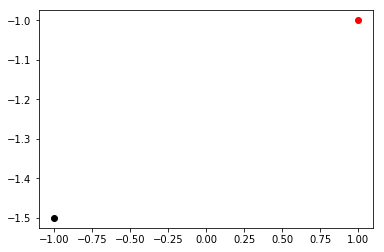

In [6]:
plt.plot(p1[0],p1[1],'ro')  
plt.plot(p2[0],p2[1],'ko')  

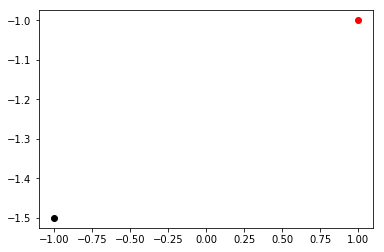

In [7]:
plt.plot(p1.numpy()[0],p1.numpy()[1],'ro')  
plt.plot(p2.numpy()[0],p2.numpy()[1],'ko')  

In [25]:
data=[
    [1,2,3],
    [5,6,7],
    [8,9,0]
]

In [26]:
t=torch.tensor(data)
t

tensor([[1, 2, 3],
        [5, 6, 7],
        [8, 9, 0]])

In [27]:
type(t)

torch.Tensor

In [28]:
t.shape

torch.Size([3, 3])

In [29]:
len(t.shape) # rank of tensor

2

In [30]:
t.reshape(1,9) # only reshapes array not array elements

tensor([[1, 2, 3, 5, 6, 7, 8, 9, 0]])

In [31]:
print(t.dtype)
print(t.device)
print(t.layout)

torch.int64
cpu
torch.strided


In [32]:
t=t.device('cuda:0') # NO GPU # 0 is the index of GPU ( incase many GPU exist index  can be changed)
t


TypeError: 'torch.device' object is not callable

Computation between different Dtypes and device not allowed for a tensor
ex: int and float
    CPU and GPU
        The datatype and device should be same for tensor computation

## ways of Creating tensors from data

In [34]:
import numpy as np
data=np.array([1,2,3])
type(data)

numpy.ndarray

In [35]:
torch.tensor(data) # factory function

tensor([1, 2, 3], dtype=torch.int32)

In [36]:
t=torch.Tensor(data) # Class constructor
t

tensor([1., 2., 3.])

In [37]:
torch.as_tensor(data) # Factory function

tensor([1, 2, 3], dtype=torch.int32)

In [38]:
torch.from_numpy(data)# factory function

tensor([1, 2, 3], dtype=torch.int32)

## creation options without data

In [23]:
torch.eye(2)

tensor([[1., 0.],
        [0., 1.]])

In [24]:
torch.zeros(2,2)

tensor([[0., 0.],
        [0., 0.]])

In [25]:
torch.rand(2,2)

tensor([[0.7963, 0.2875],
        [0.8880, 0.4131]])

## ------------------------------------------------------

In [26]:
dev =torch.device('cuda:0')
dev

device(type='cuda', index=0)

In [27]:
t1=torch.Tensor(data) # constructor
t2=torch.tensor(data) ### Factory functions
t3=torch.as_tensor(data)
t4=torch.from_numpy(data)

In [28]:
print(t1)
print(t2)
print(t3)
print(t4)

tensor([1., 2., 3.])
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3], dtype=torch.int32)


In [29]:
print(t1.dtype)
print(t2.dtype)
print(t3.dtype)
print(t4.dtype)

torch.float32
torch.int32
torch.int32
torch.int32


In [30]:
torch.get_default_dtype()

torch.float32

In [31]:
torch.tensor(np.array([1,2,3]))

tensor([1, 2, 3], dtype=torch.int32)

In [32]:
torch.tensor(np.array([1.,2.,3.])) # dtype is inferred based on the incoming data..

tensor([1., 2., 3.], dtype=torch.float64)

In [33]:
#explicit setting of dtype
torch.tensor(np.array([1,2,3]), dtype=torch.float64)

tensor([1., 2., 3.], dtype=torch.float64)

In [34]:
data=np.array([1,2,3]) 

In [35]:
t1=torch.Tensor(data) # constructor
t2=torch.tensor(data) ### Factory functions which accepts parameter input and return particular type of object (in this case tensors)
t3=torch.as_tensor(data) # can accept any array like python data structures except built-in list type.
t4=torch.from_numpy(data) # can accept only nympy arrays

In [36]:
data[0]=0
data[1]=0
data[2]=0

In [37]:
print(t1) ## memory copy
print(t2)
print(t3) ## Share memory
print(t4)

tensor([1., 2., 3.])
tensor([1, 2, 3], dtype=torch.int32)
tensor([0, 0, 0], dtype=torch.int32)
tensor([0, 0, 0], dtype=torch.int32)


## Tensor operation types


In [2]:
t=torch.tensor([
    [1,1,1,1],
    [2,2,2,2],
    [3,3,3,3]
], dtype=torch.float32)
len(t)

3

In [39]:
t.size()

torch.Size([3, 4])

In [40]:
t.shape

torch.Size([3, 4])

In [41]:
len(t.shape) # Rank of tensor

2

In [42]:
torch.tensor(t.shape).prod()

tensor(12)

In [43]:
t.numel() # number of elements

12

### Reshaping


In [44]:
print(t.reshape(2,6))
print(t.reshape(3,4))
print(t.reshape(4,3))
print(t.reshape(6,2))
print(t.reshape(12,1))
print(t.reshape(1,12))

tensor([[1., 1., 1., 1., 2., 2.],
        [2., 2., 3., 3., 3., 3.]])
tensor([[1., 1., 1., 1.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.]])
tensor([[1., 1., 1.],
        [1., 2., 2.],
        [2., 2., 3.],
        [3., 3., 3.]])
tensor([[1., 1.],
        [1., 1.],
        [2., 2.],
        [2., 2.],
        [3., 3.],
        [3., 3.]])
tensor([[1.],
        [1.],
        [1.],
        [1.],
        [2.],
        [2.],
        [2.],
        [2.],
        [3.],
        [3.],
        [3.],
        [3.]])
tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])


In [45]:
t.reshape(2,2,3)

tensor([[[1., 1., 1.],
         [1., 2., 2.]],

        [[2., 2., 3.],
         [3., 3., 3.]]])

In [46]:
t.reshape(2,3,2)

tensor([[[1., 1.],
         [1., 1.],
         [2., 2.]],

        [[2., 2.],
         [3., 3.],
         [3., 3.]]])

In [47]:
print(t.reshape(1,12))
print(t.reshape(1,12).shape)

tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])
torch.Size([1, 12])


In [48]:
print(t.reshape(1,12).squeeze())
print(t.reshape(1,12).squeeze().shape)

tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])
torch.Size([12])


In [49]:
print(t.reshape(3,4).squeeze())
print(t.reshape(3,4).squeeze().shape)

tensor([[1., 1., 1., 1.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.]])
torch.Size([3, 4])


In [50]:
print(t.reshape(3,4).squeeze().unsqueeze(dim=0))
print(t.reshape(3,4).squeeze().unsqueeze(dim=0).shape)

tensor([[[1., 1., 1., 1.],
         [2., 2., 2., 2.],
         [3., 3., 3., 3.]]])
torch.Size([1, 3, 4])


In [51]:
print(t.reshape(1,12).squeeze().unsqueeze(dim=0))
print(t.reshape(1,12).squeeze().unsqueeze(dim=0).shape)

tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])
torch.Size([1, 12])


In [5]:
print(t.reshape(1,12).squeeze().unsqueeze(dim=0))
print(t.reshape(1,12).squeeze().unsqueeze(dim=0).shape)
print(t.reshape(1,12).unsqueeze(dim=0))

tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])
torch.Size([1, 12])
tensor([[[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]]])


In [6]:
print(t.reshape(1,12).squeeze())
print(t.reshape(1,12).unsqueeze(dim=0))

tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])
tensor([[[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]]])


In [53]:
# flatten the tensor

def flatten(t):
    t=t.reshape(1,-1) # -1 tells the reshape function to figure out number of elements in the tensor by itself...
    t=t.squeeze() # converts to lowest rank tensor i.e., rank 1
    return t

In [54]:
flatten(t) #reshape and squeeze(flatten)

tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])

In [55]:
t.reshape(1,12) # reshape only

tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])

In [50]:
# concatinating tensors

t1= torch.tensor([
    [1,2],
    [3,4]
])

t2= torch.tensor([
    [5,6],
    [7,8]
])

In [51]:
torch.cat((t1,t2), dim=0)

tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])

In [52]:
t=torch.stack((t1,t2))
print(t)

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])


In [53]:
t[0]

tensor([[1, 2],
        [3, 4]])

In [54]:
t[0][0]

tensor([1, 2])

In [55]:
t[0][0][0]

tensor(1)

In [65]:
t.reshape(1,-1)

tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [66]:
t.reshape(-1)

tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [67]:
t.view(t.numel())

tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [68]:
t.flatten()

tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [58]:
# column-wise and row-wise contatination .....excersise

## Element wise/ component wise / point wise operations
corresponding elements must of same size and shape

In [56]:
t1=torch.tensor([
    [1,2],
    [3,4]
], dtype=torch.float32)

t2=torch.tensor([
    [5,6],
    [7,8]
], dtype=torch.float32)

In [22]:
t1[0]

tensor([1., 2.])

In [23]:
t1[0][0]

tensor(1.)

In [24]:
t2[1][1]

tensor(8.)

In [25]:
t1 + t2

tensor([[ 6.,  8.],
        [10., 12.]])

In [26]:
t1-2

tensor([[-1.,  0.],
        [ 1.,  2.]])

In [27]:
t1+3

tensor([[4., 5.],
        [6., 7.]])

In [28]:
t1*2

tensor([[2., 4.],
        [6., 8.]])

In [29]:
t1.add(2)

tensor([[3., 4.],
        [5., 6.]])

In [30]:
t1.sub(1)

tensor([[0., 1.],
        [2., 3.]])

In [31]:
t1.mul(4)

tensor([[ 4.,  8.],
        [12., 16.]])

In [32]:
t1.div(2)

tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])

In [34]:
import numpy as np
np.broadcast_to(3, t1.shape)

array([[3, 3],
       [3, 3]])

In [35]:
t1 + 3

tensor([[4., 5.],
        [6., 7.]])

In [36]:
t1 + torch.tensor(
    np.broadcast_to(3, t1.shape)
    ,dtype=torch.float32
)

tensor([[4., 5.],
        [6., 7.]])

In [37]:
t1=torch.tensor([
    [1,2],
    [3,4]
], dtype=torch.float32)

t2=torch.tensor([4,5], dtype=torch.float32)

In [38]:
np.broadcast_to(t2.numpy(), t1.shape)

array([[4., 5.],
       [4., 5.]], dtype=float32)

In [39]:
t1 + t2

tensor([[5., 7.],
        [7., 9.]])

In [57]:
t=torch.tensor([
    [0,1,2],
    [3,0,4],
    [0,5,0]
], dtype=torch.float32)

In [42]:
t.eq(0)

tensor([[1, 0, 0],
        [0, 1, 0],
        [1, 0, 1]], dtype=torch.uint8)

In [43]:
t.ge(1)

tensor([[0, 1, 1],
        [1, 0, 1],
        [0, 1, 0]], dtype=torch.uint8)

In [44]:
t.lt(2)

tensor([[1, 1, 0],
        [0, 1, 0],
        [1, 0, 1]], dtype=torch.uint8)

In [45]:
t.le(1)

tensor([[1, 1, 0],
        [0, 1, 0],
        [1, 0, 1]], dtype=torch.uint8)

In [82]:
t.gt(1)

tensor([[0, 0, 1],
        [1, 0, 1],
        [0, 1, 0]], dtype=torch.uint8)

In [83]:
t <= torch.tensor(
    np.broadcast_to(4, t.shape)
    ,dtype=torch.float32
)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 0, 1]], dtype=torch.uint8)

In [84]:
t <= torch.tensor([
    [7,7,7],
    [7,7,7],
    [7,7,7]
],dtype=torch.float32)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.uint8)

In [85]:
t.abs()

tensor([[0., 1., 2.],
        [3., 0., 4.],
        [0., 5., 0.]])

In [86]:
t.sqrt()

tensor([[0.0000, 1.0000, 1.4142],
        [1.7321, 0.0000, 2.0000],
        [0.0000, 2.2361, 0.0000]])

In [87]:
t.neg()

tensor([[-0., -1., -2.],
        [-3., -0., -4.],
        [-0., -5., -0.]])

In [88]:
t.neg().abs()

tensor([[0., 1., 2.],
        [3., 0., 4.],
        [0., 5., 0.]])

## Reduction operations

In [58]:
t = torch.tensor([
    [0,1,0],
    [2,0,2],
    [0,3,0]
],dtype=torch.float32)

In [90]:
t.sum()

tensor(8.)

In [91]:
t.numel()

9

In [59]:
t.sum().numel()

1

In [93]:
t.sum().numel() < t.numel()

True

In [94]:
t.prod()

tensor(0.)

In [95]:
t.mean()

tensor(0.8889)

In [60]:
t.std()

tensor(1.1667)

In [61]:
t= torch.tensor([
    [1,1,1,1],
    [2,2,2,2],
    [3,3,3,3]
], dtype = torch.float32)

In [62]:
t.sum(dim=0)

tensor([6., 6., 6., 6.])

In [99]:
t.sum(dim=1)

tensor([ 4.,  8., 12.])

In [100]:
# == t[0].sum() , t[1].sum(), t[2].sum() 

In [63]:
t = torch.tensor([
    [0,2,4,6],
    [0,1,2,3],
    [0,1,3,8]
], dtype=torch.float32)

In [102]:
t.max()

tensor(8.)

In [103]:
t.argmax()

tensor(11)

In [104]:
t.max(dim=0)

torch.return_types.max(
values=tensor([0., 2., 4., 8.]),
indices=tensor([2, 0, 0, 2]))

In [64]:
t=torch.tensor([
    [1,2,3],
    [4,5,6],
    [7,8,9]
], dtype=torch.float32)

In [106]:
t.mean()

tensor(5.)

In [107]:
t.mean().item()

5.0

In [108]:
t.mean(dim=1).tolist()

[2.0, 5.0, 8.0]

In [109]:
t.mean(dim=1).numpy()

array([2., 5., 8.], dtype=float32)

In [1]:
import torch
import torchvision # provides datasets, model architectures, image transformatiion for computer vision.
import torchvision.transforms as transforms

In [3]:
train_set=torchvision.datasets.FashionMNIST(
    root='./data/FashionMNIST',
    train=True,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor()
    ]))

26427392it [00:39, 771776.63it/s]                                              

Extracting ./data/FashionMNIST\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data/FashionMNIST\FashionMNIST\raw



0it [00:00, ?it/s]
 56%|██████████████████▎              | 16384/29515 [00:00<00:00, 68547.22it/s]
32768it [00:00, 37449.21it/s]                                                  

Extracting ./data/FashionMNIST\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data/FashionMNIST\FashionMNIST\raw



26427392it [00:49, 771776.63it/s]
 99%|███████████████████████████▊| 4399104/4422102 [00:28<00:00, 230562.30it/s]

Extracting ./data/FashionMNIST\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data/FashionMNIST\FashionMNIST\raw




0it [00:00, ?it/s]

  0%|                                                 | 0/5148 [00:00<?, ?it/s]

8192it [00:00, 9010.56it/s]                                                    

Extracting ./data/FashionMNIST\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST\FashionMNIST\raw
Processing...
Done!



4423680it [00:48, 230562.30it/s]                                               

In [7]:
train_loader=torch.utils.data.DataLoader(train_set, batch_size=10)

In [8]:
import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)

In [9]:
len(train_set)

60000

In [10]:
train_set.train_labels

E:\Anzconda\lib\site-packages\torchvision\datasets\mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([9, 0, 0,  ..., 3, 0, 5])

In [13]:
train_set.train_labels.bincount() #the labels are balanced in the dataset ....

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [28]:
sample = next(iter(train_set))

In [29]:
len(sample)

2

In [30]:
type(sample)

tuple

In [31]:
image, label = sample

In [19]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039,
          0.0000, 0.0000, 0.0510, 0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039,
       

In [32]:
label

9

In [33]:
image.shape

torch.Size([1, 28, 28])

In [34]:
label.shape #  ???????????

AttributeError: 'int' object has no attribute 'shape'

Label 9


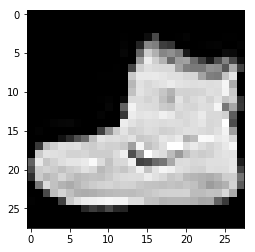

In [27]:
plt.imshow(image.squeeze(), cmap='gray')
print('Label', label)

In [35]:
batch = next(iter(train_loader))

In [36]:
len(batch)

2

In [37]:
type(batch)

list

In [44]:
images, labels = batch

In [45]:
images.shape

torch.Size([10, 1, 28, 28])

In [46]:
labels.shape

torch.Size([10])

Labels tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


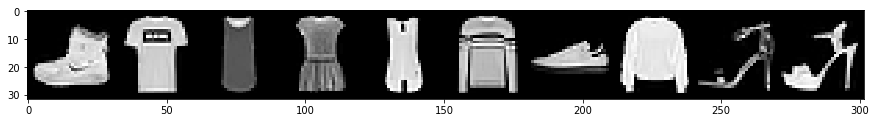

In [50]:
grid = torchvision.utils.make_grid(images, nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

print('Labels', labels)

In [54]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)

In [56]:
batch = next(iter(train_loader))

In [57]:
images, labels = batch

Labels tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8, 4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5,
        2, 1, 6, 6, 7, 9, 5, 9, 2, 7, 3, 0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5, 0, 2, 0, 0, 4, 1, 3, 1, 6, 3,
        1, 4, 4, 6, 1, 9, 1, 3, 5, 7, 9, 7, 1, 7, 9, 9, 9, 3, 2, 9, 3, 6, 4, 1, 1, 8])


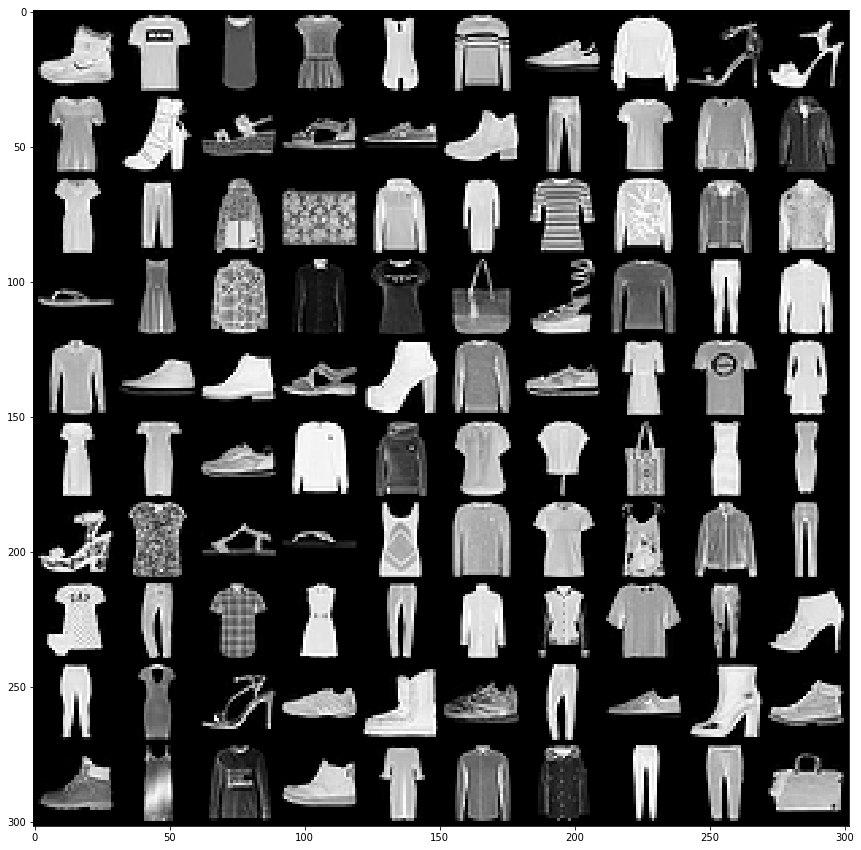

In [58]:
grid = torchvision.utils.make_grid(images, nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

print('Labels', labels)

## Convolution NN 

In [71]:
import torch.nn as nn

In [80]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=1)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)


    def forward(self, t):
        #implement the forward pass
        return t
    
    

In [81]:
network = Network()
print(network)

Network(
  (conv1): Conv2d(1, 6, kernel_size=(1, 1), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


In [ ]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=1)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)


    def forward(self, t):
        #implement the forward pass
        return t
    
    # Overriding python default representation
    
    def __repr__(self):
        return "HiHello"
    
    

In [79]:
network = Network()
network

HiHello

In [82]:
network.conv1

Conv2d(1, 6, kernel_size=(1, 1), stride=(1, 1))

In [83]:
network.conv2

Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))

In [84]:
network.fc1

Linear(in_features=192, out_features=120, bias=True)

In [85]:
network.fc2

Linear(in_features=120, out_features=60, bias=True)

In [86]:
network.out

Linear(in_features=60, out_features=10, bias=True)

In [87]:
network

Network(
  (conv1): Conv2d(1, 6, kernel_size=(1, 1), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

In [89]:
network.conv1.weight.shape

torch.Size([6, 1, 1, 1])

In [95]:
len(network.conv1.weight.shape) # rank 4

4

In [90]:
network.conv2.weight.shape

torch.Size([12, 6, 5, 5])

In [91]:
network.fc1.weight.shape

torch.Size([120, 192])

In [93]:
network.fc2.weight.shape

torch.Size([60, 120])

In [94]:
network.out.weight.shape

torch.Size([10, 60])

In [96]:
len(network.out.weight.shape)

2

In [98]:
in_features = torch.tensor([1,2,3,4], dtype=torch.float32)

In [99]:
weight_matrix = torch.tensor([
    [1,2,3,4],
    [2,3,4,5],
    [3,4,5,6]
], dtype=torch.float32)

In [100]:
weight_matrix.matmul(in_features)

tensor([30., 40., 50.])

In [108]:
fc = nn.Linear(in_features=4, out_features=3)

In [109]:
fc.weight = nn.Parameter(weight_matrix)

In [110]:
fc(in_features)

tensor([30.2898, 39.5922, 50.1906], grad_fn=<AddBackward0>)

In [113]:
fc = nn.Linear(in_features=4, out_features=3, bias=False) # turnoff bias

In [114]:
fc.weight = nn.Parameter(weight_matrix)

In [115]:
fc(in_features)

tensor([30., 40., 50.], grad_fn=<SqueezeBackward3>)

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
torch.set_printoptions(linewidth=120)

In [44]:
print(torch.__version__)
print(torchvision.__version__)

1.2.0
0.4.0


In [5]:
train_set=torchvision.datasets.FashionMNIST(
    root='./data/FashionMNIST',
    train=True,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor()
    ]))

In [31]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)


    def forward(self, t):
        
            
        t = F.relu(self.conv1(t))
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        
        t = F.relu(self.conv2(t))
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
                
        t = F.relu(self.fc1(t.reshape(-1, 12*4*4)))
        t = F.relu(self.fc2(t))
        
        t = self.out(t)
        #t = F.softmax(t, dim=1)        
        
        return t

In [32]:
# turn off pytorch's dynamic computational graph: reduces memory consumption

torch.set_grad_enabled(False)

In [33]:
network = Network()

In [34]:
sample = next(iter(train_set))
image, label = sample
image.shape

torch.Size([1, 28, 28])

In [68]:
image.unsqueeze(0).shape # gives us a batch with size 1, because n/w works with batches only

torch.Size([1, 1, 28, 28])

In [37]:
pred=network(image.unsqueeze(0)) # image shape needs to be (batch_size x in_channels x H x W)

In [38]:
pred.shape

torch.Size([1, 10])

In [39]:
pred

tensor([[ 0.0383, -0.0034, -0.0145, -0.0086,  0.0194, -0.1078,  0.0540, -0.0357, -0.0857,  0.0922]])

In [40]:
label

9

In [41]:
pred.argmax(dim=1)

tensor([9])

In [42]:
F.softmax(pred, dim=1)

tensor([[0.1043, 0.1000, 0.0989, 0.0995, 0.1023, 0.0901, 0.1059, 0.0968, 0.0921, 0.1100]])

In [43]:
F.softmax(pred, dim=1).sum()

tensor(1.0000)

## Batch image processing # Network works with batches only


In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
torch.set_printoptions(linewidth=120)

In [44]:
print(torch.__version__)
print(torchvision.__version__)

1.2.0
0.4.0


In [5]:
train_set=torchvision.datasets.FashionMNIST(
    root='./data/FashionMNIST',
    train=True,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor()
    ]))

In [51]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)


    def forward(self, t):
        #1 input layer
        t=t
        
        #2 hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        #3 hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        #4  hidden linear layerr
        t = self.fc1(t.reshape(-1, 12*4*4))
        t = F.relu(t)
        
        #5 hidden ilnear layer 
        t = self.fc2(t)
        t = F.relu(t)
        
        #6 output layer
        t = self.out(t)
        #t = F.softmax(t, dim=1)        
        
        return t

In [52]:
torch.set_grad_enabled(False)

In [53]:
network = Network()

In [54]:
data_loader = torch.utils.data.DataLoader(
        train_set,
        batch_size=10
)

In [55]:
batch = next(iter(data_loader))

In [56]:
images, labels = batch

In [57]:
images.shape

torch.Size([10, 1, 28, 28])

In [58]:
labels.shape

torch.Size([10])

In [59]:
pred = network(images)

In [60]:
pred.shape

torch.Size([10, 10])

In [61]:
pred

tensor([[-5.9135e-02,  1.2926e-01, -7.6741e-02, -1.0175e-01,  1.0148e-03, -4.3396e-02, -1.0575e-01,  1.4112e-02,
         -9.1244e-02,  1.4120e-01],
        [-7.0662e-02,  1.3096e-01, -7.6045e-02, -9.6391e-02,  8.2554e-03, -4.3824e-02, -1.0493e-01,  1.0780e-02,
         -1.0107e-01,  1.4025e-01],
        [-6.5102e-02,  1.3408e-01, -8.0688e-02, -1.0326e-01, -9.9551e-04, -3.9149e-02, -1.0464e-01,  9.5984e-03,
         -9.7957e-02,  1.4491e-01],
        [-6.4490e-02,  1.3232e-01, -7.9151e-02, -9.9678e-02,  2.3251e-03, -4.3662e-02, -1.0634e-01,  1.2217e-02,
         -1.0073e-01,  1.4203e-01],
        [-7.2076e-02,  1.3305e-01, -7.2556e-02, -1.0609e-01,  4.8306e-03, -3.9612e-02, -1.0608e-01,  1.2404e-02,
         -9.7904e-02,  1.4783e-01],
        [-6.8029e-02,  1.2659e-01, -7.6275e-02, -9.8134e-02,  3.6282e-03, -4.5316e-02, -1.0948e-01,  7.3342e-03,
         -9.5415e-02,  1.3949e-01],
        [-6.4872e-02,  1.3038e-01, -7.6516e-02, -1.0607e-01, -6.7716e-05, -3.9901e-02, -1.0651e-01,  1.323

In [62]:
pred.argmax(dim=1)

tensor([9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [63]:
labels

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])

In [64]:
pred.argmax(dim=1).eq(labels)

tensor([ True, False, False, False, False, False, False, False, False, False])

In [65]:
pred.argmax(dim=1).eq(labels).sum()

tensor(1)

In [66]:
def get_correct(pred, labels):
    return pred.argmax(dim=1).eq(labels).sum().item()

In [67]:
get_correct(pred, labels)

1

In [69]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
torch.set_printoptions(linewidth=120)

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)


    def forward(self, t):
        #1 input layer
        t=t
        
        #2 hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        #3 hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        #4  hidden linear layerr
        t = self.fc1(t.reshape(-1, 12*4*4)) 
        t = F.relu(t)
        
        #5 hidden ilnear layer 
        t = self.fc2(t)
        t = F.relu(t)
        
        #6 output layer
        t = self.out(t)
        #t = F.softmax(t, dim=1)        
        
        return t


network = Network()

train_set=torchvision.datasets.FashionMNIST(
root='./data/FashionMNIST',
train=True,
download=True,
transform=transforms.Compose([
    transforms.ToTensor()
]))

sample = next(iter(train_set))
images, labels = sample

output = network(images.unsqueeze(0))
print(output)

tensor([[-0.0483, -0.0072, -0.0098, -0.0754, -0.0595, -0.0631, -0.0729, -0.0718,  0.0153,  0.0678]])


## Training a pytorch CNN-calculate loss, gradient and update weights

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms
torch.set_printoptions(linewidth=120)# display option for output
torch.set_grad_enabled(True) # ON by default

In [3]:
def get_correct(pred, labels):
    return pred.argmax(dim=1).eq(labels).sum().item()

In [40]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)


    def forward(self, t):
        #1 input layer
        t=t
        
        #2 hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        #3 hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        #4  hidden linear layerr
        t = self.fc1(t.reshape(-1, 12*4*4)) 
        t = F.relu(t)
        
        #5 hidden ilnear layer 
        t = self.fc2(t)
        t = F.relu(t)
        
        #6 output layer
        t = self.out(t)
        #t = F.softmax(t, dim=1)        
        
        return t

train_set=torchvision.datasets.FashionMNIST(
root='./data/FashionMNIST',
train=True,
download=True,
transform=transforms.Compose([
    transforms.ToTensor()
]))

print(" Training set lenght:", len(train_set))

# sample = next(iter(train_set))
# images, labels = sample

# output = network(images.unsqueeze(0))
# print(output)

 Training set lenght: 60000


In [25]:
network = Network()

In [5]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
batch = next(iter(train_loader))
images, labels = batch

## Calculating loss

In [8]:
preds = network(images)
loss = F.cross_entropy(preds, labels) # calculating the loss
loss.item()

2.3160173892974854

## Calculating the gradient

In [9]:
print(network.conv1.weight.grad)

None


In [10]:
loss.backward() #calculating the ggradient

In [11]:
network.conv1.weight.grad.shape

torch.Size([6, 1, 5, 5])

In [15]:
optimizer = optim.Adam(network.parameters(), lr=0.01) # lr: learning rate, SGD --> Adam
# network.parameters:  to update the weights

In [16]:
loss.item()

2.3160173892974854

In [18]:
get_correct(preds, labels)

9

In [20]:
optimizer.step() #updating the weights

In [21]:
preds = network(images)
loss = F.cross_entropy(preds, labels)

In [22]:
loss.item()`

2.2885961532592773

In [23]:
get_correct(preds, labels)

11

## Training with single batch

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms
torch.set_printoptions(linewidth=120)# display option for output
torch.set_grad_enabled(True) # ON by default

In [1]:
print(torch.__version__)
print(torchvision.__version__)

NameError: name 'torch' is not defined

In [2]:
def get_correct(pred, labels):
    return pred.argmax(dim=1).eq(labels).sum().item()

In [3]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)


    def forward(self, t):
        #1 input layer
        t=t
        
        #2 hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        #3 hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        #4  hidden linear layerr
        t = self.fc1(t.reshape(-1, 12*4*4)) 
        t = F.relu(t)
        
        #5 hidden ilnear layer 
        t = self.fc2(t)
        t = F.relu(t)
        
        #6 output layer
        t = self.out(t)
        #t = F.softmax(t, dim=1)        
        
        return t

train_set=torchvision.datasets.FashionMNIST(
root='./data/FashionMNIST',
train=True,
download=True,
transform=transforms.Compose([
    transforms.ToTensor()
]))

print(" Training set lenght:", len(train_set))

# sample = next(iter(train_set))
# images, labels = sample

# output = network(images.unsqueeze(0))
# print(output)

 Training set lenght: 60000


In [4]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=200)
optimizer = optim.Adam(network.parameters(), lr=0.01) # lr: learning rate, SGD --> Adam

total_loss = 0
total_correct = 0

for batch in train_loader:
    images, labels = batch

    preds = network(images)
    loss = F.cross_entropy(preds, labels) # calculating the loss
    
    optimizer.zero_grad()
    loss.backward() #calculating the gradient
    optimizer.step() #updating the weights
    
    total_loss += loss.item()
    total_correct += get_correct(preds, labels)
    
    
print("epoch:", 0, "total_correct:", total_correct, "loss:", total_loss)

epoch: 0 total_correct: 45745 loss: 186.73787423968315


In [5]:
print(len(train_set))
print(total_correct / len(train_set))

60000
0.7624166666666666


In [12]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=200)
optimizer = optim.Adam(network.parameters(), lr=0.01) # lr: learning rate, SGD --> Adam

for epoch in range(50):
    total_loss = 0
    total_correct = 0

    for batch in train_loader:
        images, labels = batch

        preds = network(images)
        loss = F.cross_entropy(preds, labels) # calculating the loss

        optimizer.zero_grad()
        loss.backward() #calculating the gradient
        optimizer.step() #updating the weights

        total_loss += loss.item()
        total_correct += get_correct(preds, labels)
        
        if total_loss == 0:
            break
        else: continue


    print("epoch:", epoch, "total_correct:", total_correct, "loss:", total_loss)

epoch: 0 total_correct: 45343 loss: 190.63711786270142
epoch: 1 total_correct: 51263 loss: 117.59503376483917
epoch: 2 total_correct: 52081 loss: 105.28757368028164
epoch: 3 total_correct: 52658 loss: 98.45485086739063
epoch: 4 total_correct: 52957 loss: 94.65340404212475
epoch: 5 total_correct: 53157 loss: 92.15379740297794
epoch: 6 total_correct: 53373 loss: 89.82787330448627
epoch: 7 total_correct: 53477 loss: 88.166066005826
epoch: 8 total_correct: 53592 loss: 85.59451514482498
epoch: 9 total_correct: 53671 loss: 84.78956899046898
epoch: 10 total_correct: 53885 loss: 82.10716265439987
epoch: 11 total_correct: 53956 loss: 81.35883133113384
epoch: 12 total_correct: 53968 loss: 81.86058159172535
epoch: 13 total_correct: 53937 loss: 80.68999601900578
epoch: 14 total_correct: 54198 loss: 78.35447433590889
epoch: 15 total_correct: 54174 loss: 78.69586104154587
epoch: 16 total_correct: 54203 loss: 77.44204600155354
epoch: 17 total_correct: 54419 loss: 74.9191961735487
epoch: 18 total_corr

In [13]:
print(len(train_set))
print(total_correct / len(train_set))

60000
0.9217166666666666


## Analyzing CNN Results___Plotting Confusion matrix

### Getting predictions for entire training set

In [6]:
def get_all_preds(model, loader):
    all_preds = torch.tensor([])
    for batch in loader:
        images, labels = batch
        
        preds = model(images)
        all_preds = torch.cat(
            (all_preds, preds), 
            dim=0
        )
    return all_preds

In [7]:
# network = Network()
with torch.no_grad():
    prediction_loader = torch.utils.data.DataLoader(train_set, batch_size=10000)
    train_preds = get_all_preds(network, prediction_loader)

print("Done....")

Done....


In [8]:
train_preds.shape

torch.Size([60000, 10])

In [11]:
print(train_preds.requires_grad)

False


In [12]:
train_preds.grad

In [13]:
train_preds.grad_fn

In [9]:
preds_correct = get_correct(train_preds, train_set.targets)

print("Total correct: ", preds_correct)
print("Accuracy: ", preds_correct / len(train_set))

Total correct:  49951
Accuracy:  0.8325166666666667


### Building confusion matrix

In [10]:
train_set.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [11]:
train_preds.argmax(dim=1)

tensor([9, 0, 0,  ..., 3, 0, 5])

In [12]:
stacked = torch.stack(
    (
        train_set.targets,
        train_preds.argmax(dim=1)
    ),
    dim=1
)

In [13]:
stacked.shape

torch.Size([60000, 2])

In [19]:
stacked

tensor([[9, 9],
        [0, 0],
        [0, 0],
        ...,
        [3, 3],
        [0, 0],
        [5, 5]])

In [20]:
stacked[0].tolist()

[9, 9]

In [14]:
cmt = torch.zeros(10, 10, dtype=torch.int32)
cmt

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=torch.int32)

In [15]:
for p in stacked:
    tl, pl = p.tolist()
    cmt[tl, pl] = cmt[tl, pl] +1

In [16]:
cmt

tensor([[5505,   10,   76,   79,   33,    2,  196,    0,   98,    1],
        [  33, 5727,   11,  183,   19,    0,   22,    0,    5,    0],
        [  75,    4, 4004,   41, 1418,    0,  279,    0,  179,    0],
        [ 597,   26,   11, 4924,  313,    0,  117,    0,   11,    1],
        [  20,   14,  251,  159, 5379,    0,  115,    0,   61,    1],
        [  20,    2,    4,    3,    0, 5310,    1,  434,   71,  155],
        [1657,   14,  700,   90, 1493,    0, 1843,    0,  203,    0],
        [   0,    0,    0,    0,    0,   36,    0, 5698,   50,  216],
        [  35,    3,   16,   42,   36,    3,   21,    5, 5837,    2],
        [   0,    1,    0,    4,    1,   15,    0,  242,   13, 5724]], dtype=torch.int32)

### plotting a confusion matrix

In [17]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
# from plotcm import plot_confusion_matrix

In [18]:
############## plotcm module ##################

import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """"
    This function print and plots the confusion maatrix.
    Normalization can be applied by setting the normalize=True
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_mark = np.arange(len(classes))
    plt.xticks(tick_mark, classes, rotation=45)
    plt.yticks(tick_mark, classes)

    fmt= '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i,j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [19]:
cm = confusion_matrix(train_set.targets, train_preds.argmax(dim=1))
print(type(cm))
cm

<class 'numpy.ndarray'>


array([[5505,   10,   76,   79,   33,    2,  196,    0,   98,    1],
       [  33, 5727,   11,  183,   19,    0,   22,    0,    5,    0],
       [  75,    4, 4004,   41, 1418,    0,  279,    0,  179,    0],
       [ 597,   26,   11, 4924,  313,    0,  117,    0,   11,    1],
       [  20,   14,  251,  159, 5379,    0,  115,    0,   61,    1],
       [  20,    2,    4,    3,    0, 5310,    1,  434,   71,  155],
       [1657,   14,  700,   90, 1493,    0, 1843,    0,  203,    0],
       [   0,    0,    0,    0,    0,   36,    0, 5698,   50,  216],
       [  35,    3,   16,   42,   36,    3,   21,    5, 5837,    2],
       [   0,    1,    0,    4,    1,   15,    0,  242,   13, 5724]],
      dtype=int64)

Confusion matrix, without normalization
[[5505   10   76   79   33    2  196    0   98    1]
 [  33 5727   11  183   19    0   22    0    5    0]
 [  75    4 4004   41 1418    0  279    0  179    0]
 [ 597   26   11 4924  313    0  117    0   11    1]
 [  20   14  251  159 5379    0  115    0   61    1]
 [  20    2    4    3    0 5310    1  434   71  155]
 [1657   14  700   90 1493    0 1843    0  203    0]
 [   0    0    0    0    0   36    0 5698   50  216]
 [  35    3   16   42   36    3   21    5 5837    2]
 [   0    1    0    4    1   15    0  242   13 5724]]


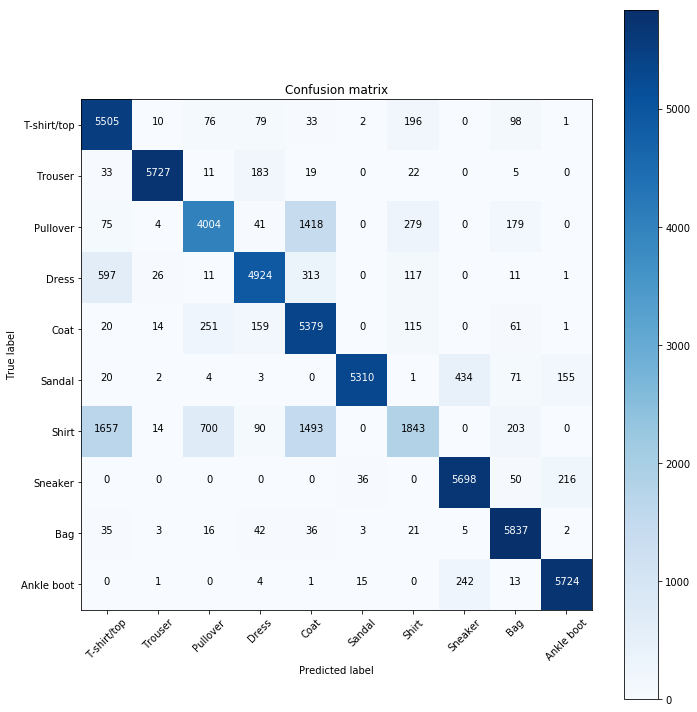

In [20]:
names = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cm, names)

## Stack vs Concatenating

In [1]:
import torch

In [2]:
t1=torch.tensor([1,1,1])

In [3]:
t1.unsqueeze(dim=0)

tensor([[1, 1, 1]])

In [4]:
t1.unsqueeze(dim=1)

tensor([[1],
        [1],
        [1]])

In [5]:
print(t1.shape)
print(t1.unsqueeze(dim=0).shape)
print(t1.unsqueeze(dim=1).shape)

torch.Size([3])
torch.Size([1, 3])
torch.Size([3, 1])


In [6]:
t1=torch.tensor([1,1,1])
t2=torch.tensor([2,2,2])
t3=torch.tensor([3,3,3])

In [8]:
torch.cat(
    (t1,t2,t3), 
    dim=0
)

tensor([1, 1, 1, 2, 2, 2, 3, 3, 3])

In [10]:
torch.stack(
        (t1,t2,t3)
        ,dim=0
)

tensor([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]])

In [11]:
#similar to stack function

torch.cat(    
    (
     t1.unsqueeze(0),
     t2.unsqueeze(0),
     t3.unsqueeze(0)
    )
    ,dim=0
)

tensor([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]])

In [13]:
#concatenating along new axis

torch.cat(    
    (
     t1.unsqueeze(1),
     t2.unsqueeze(1),
     t3.unsqueeze(1)
    )
    ,dim=0
)

tensor([[1],
        [1],
        [1],
        [2],
        [2],
        [2],
        [3],
        [3],
        [3]])

## Tensorflow: stack vs concat

In [3]:
import tensorflow as tf

In [5]:
t1=tf.constant([1,1,1])
t2=tf.constant([2,2,2])
t3=tf.constant([3,3,3])

In [6]:
tf.concat(
    (t1,t2,t3), 
    axis=0
)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([1, 1, 1, 2, 2, 2, 3, 3, 3])>

In [7]:
tf.stack(
        (t1,t2,t3)
        ,axis=0
)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])>

In [12]:
# similar ro unsqueeze and squeze in pytorch

tf.concat(
        (
            tf.expand_dims(t1,0),
            tf.expand_dims(t2,0),
            tf.expand_dims(t3,0)
        ), axis=0            
)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])>

In [13]:
# concatenating along the index 1 or axis=1

tf.concat(
        (
            tf.expand_dims(t1,1),
            tf.expand_dims(t2,1),
            tf.expand_dims(t3,1)
        ), axis=1            
)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])>

## Numpy stack vs concat

In [14]:
import numpy as np

In [15]:
t1=np.array([1,1,1])
t2=np.array([2,2,2])
t3=np.array([3,3,3])

In [16]:
np.concatenate(
        (t1,t2,t3)
        , axis=0
)

array([1, 1, 1, 2, 2, 2, 3, 3, 3])

In [17]:
np.stack(
        (t1,t2,t3)
        , axis=0
)

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [18]:
# similar to unsqueeze and squeze in pytorch

np.concatenate(
        (
            tf.expand_dims(t1,0),
            tf.expand_dims(t2,0),
            tf.expand_dims(t3,0)
        ), axis=0            
)

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [20]:
# ??np.stack # will open stack module pager

In [21]:
np.stack(
        (t1,t2,t3)
        , axis=1
)

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [22]:
# similar to unsqueeze and squeze in pytorch

np.concatenate(
        (
            tf.expand_dims(t1,1),
            tf.expand_dims(t2,1),
            tf.expand_dims(t3,1)
        ), axis=1            
)

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [1]:
import sys
sys.version # python version

'3.6.10 |Anaconda, Inc.| (default, May  7 2020, 19:46:08) [MSC v.1916 64 bit (AMD64)]'

In [2]:
import tensorflow
print(tensorflow.__version__)
# pip install tf-nightly-cpu

2.4.0-dev20200730


In [3]:
import torch
import torchvision
print(torch.__version__)
print(torchvision.__version__)
# conda install pytorch-cpu torchvision-cpu -c pytorch

1.1.0
0.3.0


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

torch.set_printoptions(linewidth=120)
torch.set_grad_enabled(True) # enabled by default

from torch.utils.tensorboard import SummaryWriter

In [2]:
def get_correct(pred, labels):
    return pred.argmax(dim=1).eq(labels).sum().item()

In [3]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)


    def forward(self, t):
        
        #2 hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        #3 hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        #4  hidden linear layerr
        t = t.flatten(start_dim=1) 
        t = F.relu(self.fc1(t))
        
        #5 hidden ilnear layer 
        t = self.fc2(t)
        t = F.relu(t)
        
        #6 output layer
        t = self.out(t)
        #t = F.softmax(t, dim=1)        
        
        return t

train_set=torchvision.datasets.FashionMNIST(
root='./data/FashionMNIST',
train=True,
download=True,
transform=transforms.Compose([
    transforms.ToTensor()
]))

print(" Training set lenght:", len(train_set))

 Training set lenght: 60000


In [16]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100, shuffle=True)

## Tensorboard (Network Graph and Images)

In [17]:
import tensorflow
import tensorboard as tb
tb = SummaryWriter()

network = Network()
images, labels = next(iter(train_loader))
grid = torchvision.utils.make_grid(images)

tb.add_image('images', grid)
tb.add_graph(network, images)
tb.close()


## Training loop review

In [8]:
import torch.optim as optim
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100, shuffle=True)
optimizer = optim.Adam(network.parameters(), lr=0.01) # lr: learning rate, SGD --> Adam

for epoch in range(1):
    total_loss = 0
    total_correct = 0

    for batch in train_loader:
        images, labels = batch

        preds = network(images)
        loss = F.cross_entropy(preds, labels) # calculating the loss

        optimizer.zero_grad()
        loss.backward() #calculating the gradient
        optimizer.step() #updating the weights

        total_loss += loss.item()
        total_correct += get_correct(preds, labels)
        
        if total_loss == 0:
            break
        else: continue


    print("epoch:", epoch, "total_correct:", total_correct, "loss:", total_loss)

epoch: 0 total_correct: 46843 loss: 344.4810744225979


In [5]:
import torch.optim as optim

batch_size=100
lr=0.01

network = Network()

train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=False
)
optimizer = optim.Adam(
    network.parameters(), lr=lr
) # lr: learning rate, SGD --> Adam

images, labels = next(iter(train_loader))
grid = torchvision.utils.make_grid(images)

tb = SummaryWriter()
tb.add_image('images', grid)
tb.add_graph(network, images)

for epoch in range(10):
    total_loss = 0
    total_correct = 0

    for batch in train_loader: # get batch
        images, labels = batch

        preds = network(images) # pass batch
        loss = F.cross_entropy(preds, labels) # calculating the loss

        optimizer.zero_grad()
        loss.backward() # calculate gradients
        optimizer.step() # update weights

        total_loss += loss.item()
        total_correct += get_correct(preds, labels)

        if total_loss == 0:
            break
        else: continue

    tb.add_scalar('Loss: ', total_loss, epoch)
    tb.add_scalar('Number correct: ', total_correct, epoch)
    tb.add_scalar('Accuracy', total_correct / len(train_set), epoch)

    tb.add_histogram('conv1.bias:', network.conv1.bias, epoch)
    tb.add_histogram('conv1.weight:', network.conv1.weight, epoch)
    tb.add_histogram('conv1.weight.grad:', network.conv1.weight.grad, epoch)


    print("epoch:", epoch, "total_correct:", total_correct, "loss:", total_loss)
    
# open terminal : run command " tensorboard --logdir=runs "
# check browser link localhost for tensorboard

epoch: 0 total_correct: 47992 loss: 320.2562424838543
epoch: 1 total_correct: 51710 loss: 220.70482420921326
epoch: 2 total_correct: 52483 loss: 203.09987016022205
epoch: 3 total_correct: 52847 loss: 192.53198111057281
epoch: 4 total_correct: 52911 loss: 189.8774118050933
epoch: 5 total_correct: 53151 loss: 183.78143912553787
epoch: 6 total_correct: 53351 loss: 179.24556041508913
epoch: 7 total_correct: 53310 loss: 178.8537878394127
epoch: 8 total_correct: 53379 loss: 177.71009589731693
epoch: 9 total_correct: 53546 loss: 173.98370277881622


## HyperParameter

In [6]:
import torch.optim as optim
from itertools import product

batch_size=100
lr=0.01

parameters = dict(
                lr=[.01,.001],
                batch_size=[10,100,1000],
                shuffle=[True, False]
            )

param_values = [v for v in parameters.values()]

for lr,batch_size,shuffle in product(*param_values):
    
    print(f"lr={lr},batch_size={batch_size},shuffle={shuffle}")

    network = Network()

    train_loader = torch.utils.data.DataLoader(
        train_set, batch_size=batch_size, shuffle=shuffle
    )
    optimizer = optim.Adam(
        network.parameters(), lr=lr
    ) # lr: learning rate, SGD --> Adam

    images, labels = next(iter(train_loader))
    grid = torchvision.utils.make_grid(images)

    comment=f' batch_size={batch_size} lr={lr} shuffle={shuffle}'
    tb = SummaryWriter(comment=comment)
    tb.add_image('images', grid)
    tb.add_graph(network, images)

    for epoch in range(5):
        total_loss = 0
        total_correct = 0

        for batch in train_loader: # get batch
            images, labels = batch

            preds = network(images) # pass batch
            loss = F.cross_entropy(preds, labels) # calculating the loss

            optimizer.zero_grad()
            loss.backward() # calculate gradients
            optimizer.step() # update weights

            total_loss += loss.item() * batch_size
            total_correct += get_correct(preds, labels)

    #         if total_loss == 0:
    #             break
    #         else: continue

        tb.add_scalar('Loss: ', total_loss, epoch)
        tb.add_scalar('Number correct: ', total_correct, epoch)
        tb.add_scalar('Accuracy', total_correct / len(train_set), epoch)

    #     tb.add_histogram('conv1.bias:', network.conv1.bias, epoch)
    #     tb.add_histogram('conv1.weight:', network.conv1.weight, epoch)
    #     tb.add_histogram('conv1.weight.grad:', network.conv1.weight.grad, epoch)

        for name, weight in network.named_parameters():
            tb.add_histogram(name, weight, epoch)
            tb.add_histogram(f'[name].grad', weight.grad, epoch)

        print("epoch:", epoch, "total_correct:", total_correct, "loss:", total_loss)

lr=0.01,batch_size=10,shuffle=True
epoch: 0 total_correct: 46384 loss: 36962.877694927156
epoch: 1 total_correct: 48735 loss: 31407.46024104301
epoch: 2 total_correct: 49208 loss: 30756.845231465995
epoch: 3 total_correct: 49251 loss: 30576.922817314044
epoch: 4 total_correct: 49664 loss: 30539.380615144037
lr=0.01,batch_size=10,shuffle=False
epoch: 0 total_correct: 46477 loss: 36283.43099363148
epoch: 1 total_correct: 48488 loss: 31679.08189815702
epoch: 2 total_correct: 49003 loss: 30473.306005029008
epoch: 3 total_correct: 48808 loss: 31202.62838131399
epoch: 4 total_correct: 49255 loss: 30348.114093751647
lr=0.01,batch_size=100,shuffle=True
epoch: 0 total_correct: 45809 loss: 36850.8517742157
epoch: 1 total_correct: 50997 loss: 24066.98007285595
epoch: 2 total_correct: 51841 loss: 21828.513951599598
epoch: 3 total_correct: 52327 loss: 20585.012677311897
epoch: 4 total_correct: 52633 loss: 19906.832356750965
lr=0.01,batch_size=100,shuffle=False
epoch: 0 total_correct: 47454 loss: 33

## Run Builder()

In [7]:
from collections import OrderedDict
from collections import namedtuple
from itertools import product

In [5]:
class RunBuilder():
    @staticmethod
    def get_runs(params):
        
        Run = namedtuple('Run', params.keys())
        runs = []
        for v in product(*params.values()):
            runs.append(Run(*v))
            
        return runs

In [14]:
parameters = OrderedDict(
                lr=[.01,.001],
                batch_size=[1000,10000]
                )

In [19]:
parameters.keys()

odict_keys(['lr', 'batch_size'])

In [20]:
parameters.values()

odict_values([[0.01, 0.001], [1000, 10000]])

In [23]:
Run = namedtuple('Run', parameters.keys())
Run

__main__.Run

In [26]:
runs = []
for v in product(*parameters.values()):
    runs.append(Run(*v))
runs

[Run(lr=0.01, batch_size=1000),
 Run(lr=0.01, batch_size=10000),
 Run(lr=0.001, batch_size=1000),
 Run(lr=0.001, batch_size=10000)]

In [15]:
runs = RunBuilder.get_runs(parameters)
runs

[Run(lr=0.01, batch_size=1000),
 Run(lr=0.01, batch_size=10000),
 Run(lr=0.001, batch_size=1000),
 Run(lr=0.001, batch_size=10000)]

## -------------------------------------------------------------------------------------------------

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

torch.set_printoptions(linewidth=120)
torch.set_grad_enabled(True) # enabled by default

from torch.utils.tensorboard import SummaryWriter
import time
import torch.optim as optim
import pandas as pd

from collections import OrderedDict
from collections import namedtuple
from itertools import product
import json
import tensorflow

In [3]:

class RunBuilder():
    @staticmethod
    def get_runs(params):
        
        Run = namedtuple('Run', params.keys())
        runs = []
        for v in product(*params.values()):
            runs.append(Run(*v))
            
        return runs
    
class RunManager():
        def __init__(self):
            self.epoch_count = 0
            self.epoch_loss = 0
            self.epoch_num_correct = 0
            self.epoch_start_time = None
            
            self.run_params = None
            self.run_count = 0
            self.run_data = []
            self.run_start_time = None
            
            self.network = None
            self.loader = None
            self.tb = None
            
        
        def begin_run(self, run, network, loader):
            
            self.run_start_time = time.time()
            
            self.run_params = run
            self.run_count +=1
            
            self.network = network
            self.loader = loader
            self.tb = SummaryWriter(comment = f'-{run}')
            
            images, labels = next(iter(self.loader))
            grid = torchvision.utils.make_grid(images)
            
            self.tb.add_image('images', grid)
            self.tb.add_graph(self.network, images)
            
        def end_run():
            self.tb.close()
            self.epoch_count = 0
            
        def begin_epoch(self):
            self.epoch_start_time = time.time()
            
            self.epoch_count +=1
            self.epoch_loss = 0
            self.epoch_num_correct = 0
            
        def end_epoch(self):
            
            epoch_duration = time.time() - self.epoch_start_time
            run_duration = time.time() - self.run_start_time
            
            loss = self.epoch_loss / len(self.loader.dataset)
            accuracy = self.epoch_num_correct / len(self.loader.dataset)
            
            self.tb.add_scalar('Loss', loss, self.epoch_count)
            self.tb.add_scalar('Accuracy', accuracy, self.epoch_count)            
            
            for name, param in self.network.named_parameters():
                self.tb.add_histogram(name, param, self.epoch_count)
                self.tb.add_histogram(f'{name}.grad', param.grad, self.epoch_count)
                
            results = OrderedDict()
            results["run"] = self.run_count
            results["epoch"] = self.epoch_count
            results["loss"] = loss
            results["accuracy"] = accuracy
            results["epoch duration"] = epoch_duration
            results["run duration"] = run_duration
            for k,v in self.run_params._asdict().items(): results[k] = v
            self.run_data.append(results)
            df = pd.DataFrame.from_dict(self.run_data, orient='columns')
            
            clear_output9wait=True
            display(df)
            
        def track_loss(self, loss):
            self.epoch_loss += loss.item() * self.loader.batch_size
            
        def track_num_correct(self, preds, labels):
            self.epoch_num_correct += self._get_num_correct(preds, labels)
        
        @torch.no_grad()
        def _get_num_correct(self, preds, labels):
            return preds.argmax(dim=1).eq(labels).sum().item()
        
        def save(self, fileName):
            
            pd.DataFrame.from_dict(
                self.run_data,
                orient = 'columns'
            ).to_csv(f'{fileName}.csv')
            
            with open(f'{fileName}.json', 'w', encoding='utf-8') as f:
                json.dump(self.run_data, f, ensure_ascii=False, indent=4)

In [4]:

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)


    def forward(self, t):
        
        #2 hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        #3 hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        #4  hidden linear layerr
        t = t.flatten(start_dim=1) 
        t = F.relu(self.fc1(t))
        
        #5 hidden ilnear layer 
        t = self.fc2(t)
        t = F.relu(t)
        
        #6 output layer
        t = self.out(t)
        #t = F.softmax(t, dim=1)        
        
        return t

train_set=torchvision.datasets.FashionMNIST(
root='./data/FashionMNIST',
train=True,
download=True,
transform=transforms.Compose([
    transforms.ToTensor()
]))

print(" Training set lenght:", len(train_set))

 Training set lenght: 60000


In [35]:

parameters = OrderedDict(
                lr=[.01],
                batch_size=[1000,2000],
                shuffle=[True, False]
                )

m = RunManager()
for run in RunBuilder.get_runs(parameters):
    
    network = Network()

    loader = torch.utils.data.DataLoader(
        train_set, batch_size=run.batch_size, shuffle=run.shuffle
    )
    optimizer = optim.Adam(
        network.parameters(), lr=run.lr
    ) # lr: learning rate, optim.SGD < or > Adam
    
    m.begin_run(run, network, loader)
    for epoch in range(5):
        m.begin_epoch()
        for batch in loader:
            
            images = batch[0]
            labels = batch[1]
            preds = network(images) # pass batch
            loss = F.cross_entropy(preds, labels) # calculate loss
            optimizer.zero_grad() # Zero Gradients
            loss.backward() # calculate Gradients
            optimizer.step() # update weights
            
            m.track_loss(loss)
            m.track_num_correct(preds, labels)
            
        m.end_epoch()
#     m.end_run()
    m.tb.close()
    m.epoch_count = 0

m.save('results')

,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,shuffle
0,1,1,1.038777,0.597633,37.338774,39.761002,0.01,1000,True


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,shuffle
0,1,1,1.038777,0.597633,37.338774,39.761002,0.01,1000,True
1,1,2,0.546142,0.791100,30.042934,69.912005,0.01,1000,True


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,shuffle
0,1,1,1.038777,0.597633,37.338774,39.761002,0.01,1000,True
1,1,2,0.546142,0.791100,30.042934,69.912005,0.01,1000,True
2,1,3,0.448250,0.835183,30.613312,100.656404,0.01,1000,True


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,shuffle
0,1,1,1.038777,0.597633,37.338774,39.761002,0.01,1000,True
1,1,2,0.546142,0.791100,30.042934,69.912005,0.01,1000,True
2,1,3,0.448250,0.835183,30.613312,100.656404,0.01,1000,True
3,1,4,0.380760,0.860600,32.574614,133.362105,0.01,1000,True


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,shuffle
0,1,1,1.038777,0.597633,37.338774,39.761002,0.01,1000,True
1,1,2,0.546142,0.791100,30.042934,69.912005,0.01,1000,True
2,1,3,0.448250,0.835183,30.613312,100.656404,0.01,1000,True
3,1,4,0.380760,0.860600,32.574614,133.362105,0.01,1000,True
4,1,5,0.349624,0.872033,31.093633,164.605838,0.01,1000,True


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,shuffle
0,1,1,1.038777,0.597633,37.338774,39.761002,0.01,1000,True
1,1,2,0.546142,0.791100,30.042934,69.912005,0.01,1000,True
2,1,3,0.448250,0.835183,30.613312,100.656404,0.01,1000,True
3,1,4,0.380760,0.860600,32.574614,133.362105,0.01,1000,True
4,1,5,0.349624,0.872033,31.093633,164.605838,0.01,1000,True
5,2,1,1.000499,0.610750,33.795423,36.026903,0.01,1000,False


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,shuffle
0,1,1,1.038777,0.597633,37.338774,39.761002,0.01,1000,True
1,1,2,0.546142,0.791100,30.042934,69.912005,0.01,1000,True
2,1,3,0.448250,0.835183,30.613312,100.656404,0.01,1000,True
3,1,4,0.380760,0.860600,32.574614,133.362105,0.01,1000,True
4,1,5,0.349624,0.872033,31.093633,164.605838,0.01,1000,True
5,2,1,1.000499,0.610750,33.795423,36.026903,0.01,1000,False
6,2,2,0.554274,0.785833,32.699697,68.854684,0.01,1000,False


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,shuffle
0,1,1,1.038777,0.597633,37.338774,39.761002,0.01,1000,True
1,1,2,0.546142,0.791100,30.042934,69.912005,0.01,1000,True
2,1,3,0.448250,0.835183,30.613312,100.656404,0.01,1000,True
3,1,4,0.380760,0.860600,32.574614,133.362105,0.01,1000,True
4,1,5,0.349624,0.872033,31.093633,164.605838,0.01,1000,True
5,2,1,1.000499,0.610750,33.795423,36.026903,0.01,1000,False
6,2,2,0.554274,0.785833,32.699697,68.854684,0.01,1000,False
7,2,3,0.458814,0.829700,31.488893,100.572729,0.01,1000,False


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,shuffle
0,1,1,1.038777,0.597633,37.338774,39.761002,0.01,1000,True
1,1,2,0.546142,0.791100,30.042934,69.912005,0.01,1000,True
2,1,3,0.448250,0.835183,30.613312,100.656404,0.01,1000,True
3,1,4,0.380760,0.860600,32.574614,133.362105,0.01,1000,True
4,1,5,0.349624,0.872033,31.093633,164.605838,0.01,1000,True
5,2,1,1.000499,0.610750,33.795423,36.026903,0.01,1000,False
6,2,2,0.554274,0.785833,32.699697,68.854684,0.01,1000,False
7,2,3,0.458814,0.829700,31.488893,100.572729,0.01,1000,False
8,2,4,0.402738,0.850383,32.269410,132.971226,0.01,1000,False


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,shuffle
0,1,1,1.038777,0.597633,37.338774,39.761002,0.01,1000,True
1,1,2,0.546142,0.791100,30.042934,69.912005,0.01,1000,True
2,1,3,0.448250,0.835183,30.613312,100.656404,0.01,1000,True
3,1,4,0.380760,0.860600,32.574614,133.362105,0.01,1000,True
4,1,5,0.349624,0.872033,31.093633,164.605838,0.01,1000,True
5,2,1,1.000499,0.610750,33.795423,36.026903,0.01,1000,False
6,2,2,0.554274,0.785833,32.699697,68.854684,0.01,1000,False
7,2,3,0.458814,0.829700,31.488893,100.572729,0.01,1000,False
8,2,4,0.402738,0.850383,32.269410,132.971226,0.01,1000,False
9,2,5,0.371441,0.863633,29.948872,163.218296,0.01,1000,False


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,shuffle
0,1,1,1.038777,0.597633,37.338774,39.761002,0.01,1000,True
1,1,2,0.546142,0.791100,30.042934,69.912005,0.01,1000,True
2,1,3,0.448250,0.835183,30.613312,100.656404,0.01,1000,True
3,1,4,0.380760,0.860600,32.574614,133.362105,0.01,1000,True
4,1,5,0.349624,0.872033,31.093633,164.605838,0.01,1000,True
5,2,1,1.000499,0.610750,33.795423,36.026903,0.01,1000,False
6,2,2,0.554274,0.785833,32.699697,68.854684,0.01,1000,False
7,2,3,0.458814,0.829700,31.488893,100.572729,0.01,1000,False
8,2,4,0.402738,0.850383,32.269410,132.971226,0.01,1000,False
9,2,5,0.371441,0.863633,29.948872,163.218296,0.01,1000,False


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,shuffle
0,1,1,1.038777,0.597633,37.338774,39.761002,0.01,1000,True
1,1,2,0.546142,0.791100,30.042934,69.912005,0.01,1000,True
2,1,3,0.448250,0.835183,30.613312,100.656404,0.01,1000,True
3,1,4,0.380760,0.860600,32.574614,133.362105,0.01,1000,True
4,1,5,0.349624,0.872033,31.093633,164.605838,0.01,1000,True
5,2,1,1.000499,0.610750,33.795423,36.026903,0.01,1000,False
6,2,2,0.554274,0.785833,32.699697,68.854684,0.01,1000,False
7,2,3,0.458814,0.829700,31.488893,100.572729,0.01,1000,False
8,2,4,0.402738,0.850383,32.269410,132.971226,0.01,1000,False
9,2,5,0.371441,0.863633,29.948872,163.218296,0.01,1000,False


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,shuffle
0,1,1,1.038777,0.597633,37.338774,39.761002,0.01,1000,True
1,1,2,0.546142,0.791100,30.042934,69.912005,0.01,1000,True
2,1,3,0.448250,0.835183,30.613312,100.656404,0.01,1000,True
3,1,4,0.380760,0.860600,32.574614,133.362105,0.01,1000,True
4,1,5,0.349624,0.872033,31.093633,164.605838,0.01,1000,True
5,2,1,1.000499,0.610750,33.795423,36.026903,0.01,1000,False
6,2,2,0.554274,0.785833,32.699697,68.854684,0.01,1000,False
7,2,3,0.458814,0.829700,31.488893,100.572729,0.01,1000,False
8,2,4,0.402738,0.850383,32.269410,132.971226,0.01,1000,False
9,2,5,0.371441,0.863633,29.948872,163.218296,0.01,1000,False


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,shuffle
0,1,1,1.038777,0.597633,37.338774,39.761002,0.01,1000,True
1,1,2,0.546142,0.791100,30.042934,69.912005,0.01,1000,True
2,1,3,0.448250,0.835183,30.613312,100.656404,0.01,1000,True
3,1,4,0.380760,0.860600,32.574614,133.362105,0.01,1000,True
4,1,5,0.349624,0.872033,31.093633,164.605838,0.01,1000,True
5,2,1,1.000499,0.610750,33.795423,36.026903,0.01,1000,False
6,2,2,0.554274,0.785833,32.699697,68.854684,0.01,1000,False
7,2,3,0.458814,0.829700,31.488893,100.572729,0.01,1000,False
8,2,4,0.402738,0.850383,32.269410,132.971226,0.01,1000,False
9,2,5,0.371441,0.863633,29.948872,163.218296,0.01,1000,False


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,shuffle
0,1,1,1.038777,0.597633,37.338774,39.761002,0.01,1000,True
1,1,2,0.546142,0.791100,30.042934,69.912005,0.01,1000,True
2,1,3,0.448250,0.835183,30.613312,100.656404,0.01,1000,True
3,1,4,0.380760,0.860600,32.574614,133.362105,0.01,1000,True
4,1,5,0.349624,0.872033,31.093633,164.605838,0.01,1000,True
5,2,1,1.000499,0.610750,33.795423,36.026903,0.01,1000,False
6,2,2,0.554274,0.785833,32.699697,68.854684,0.01,1000,False
7,2,3,0.458814,0.829700,31.488893,100.572729,0.01,1000,False
8,2,4,0.402738,0.850383,32.269410,132.971226,0.01,1000,False
9,2,5,0.371441,0.863633,29.948872,163.218296,0.01,1000,False


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,shuffle
0,1,1,1.038777,0.597633,37.338774,39.761002,0.01,1000,True
1,1,2,0.546142,0.791100,30.042934,69.912005,0.01,1000,True
2,1,3,0.448250,0.835183,30.613312,100.656404,0.01,1000,True
3,1,4,0.380760,0.860600,32.574614,133.362105,0.01,1000,True
4,1,5,0.349624,0.872033,31.093633,164.605838,0.01,1000,True
5,2,1,1.000499,0.610750,33.795423,36.026903,0.01,1000,False
6,2,2,0.554274,0.785833,32.699697,68.854684,0.01,1000,False
7,2,3,0.458814,0.829700,31.488893,100.572729,0.01,1000,False
8,2,4,0.402738,0.850383,32.269410,132.971226,0.01,1000,False
9,2,5,0.371441,0.863633,29.948872,163.218296,0.01,1000,False


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,shuffle
0,1,1,1.038777,0.597633,37.338774,39.761002,0.01,1000,True
1,1,2,0.546142,0.791100,30.042934,69.912005,0.01,1000,True
2,1,3,0.448250,0.835183,30.613312,100.656404,0.01,1000,True
3,1,4,0.380760,0.860600,32.574614,133.362105,0.01,1000,True
4,1,5,0.349624,0.872033,31.093633,164.605838,0.01,1000,True
5,2,1,1.000499,0.610750,33.795423,36.026903,0.01,1000,False
6,2,2,0.554274,0.785833,32.699697,68.854684,0.01,1000,False
7,2,3,0.458814,0.829700,31.488893,100.572729,0.01,1000,False
8,2,4,0.402738,0.850383,32.269410,132.971226,0.01,1000,False
9,2,5,0.371441,0.863633,29.948872,163.218296,0.01,1000,False


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,shuffle
0,1,1,1.038777,0.597633,37.338774,39.761002,0.01,1000,True
1,1,2,0.546142,0.791100,30.042934,69.912005,0.01,1000,True
2,1,3,0.448250,0.835183,30.613312,100.656404,0.01,1000,True
3,1,4,0.380760,0.860600,32.574614,133.362105,0.01,1000,True
4,1,5,0.349624,0.872033,31.093633,164.605838,0.01,1000,True
5,2,1,1.000499,0.610750,33.795423,36.026903,0.01,1000,False
6,2,2,0.554274,0.785833,32.699697,68.854684,0.01,1000,False
7,2,3,0.458814,0.829700,31.488893,100.572729,0.01,1000,False
8,2,4,0.402738,0.850383,32.269410,132.971226,0.01,1000,False
9,2,5,0.371441,0.863633,29.948872,163.218296,0.01,1000,False


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,shuffle
0,1,1,1.038777,0.597633,37.338774,39.761002,0.01,1000,True
1,1,2,0.546142,0.791100,30.042934,69.912005,0.01,1000,True
2,1,3,0.448250,0.835183,30.613312,100.656404,0.01,1000,True
3,1,4,0.380760,0.860600,32.574614,133.362105,0.01,1000,True
4,1,5,0.349624,0.872033,31.093633,164.605838,0.01,1000,True
5,2,1,1.000499,0.610750,33.795423,36.026903,0.01,1000,False
6,2,2,0.554274,0.785833,32.699697,68.854684,0.01,1000,False
7,2,3,0.458814,0.829700,31.488893,100.572729,0.01,1000,False
8,2,4,0.402738,0.850383,32.269410,132.971226,0.01,1000,False
9,2,5,0.371441,0.863633,29.948872,163.218296,0.01,1000,False


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,shuffle
0,1,1,1.038777,0.597633,37.338774,39.761002,0.01,1000,True
1,1,2,0.546142,0.791100,30.042934,69.912005,0.01,1000,True
2,1,3,0.448250,0.835183,30.613312,100.656404,0.01,1000,True
3,1,4,0.380760,0.860600,32.574614,133.362105,0.01,1000,True
4,1,5,0.349624,0.872033,31.093633,164.605838,0.01,1000,True
5,2,1,1.000499,0.610750,33.795423,36.026903,0.01,1000,False
6,2,2,0.554274,0.785833,32.699697,68.854684,0.01,1000,False
7,2,3,0.458814,0.829700,31.488893,100.572729,0.01,1000,False
8,2,4,0.402738,0.850383,32.269410,132.971226,0.01,1000,False
9,2,5,0.371441,0.863633,29.948872,163.218296,0.01,1000,False


## num_workers

In [10]:

parameters = OrderedDict(
                lr=[.01]
                ,batch_size=[100,1000,10000]
                ,num_workers=[0,1,2,4,8,12]
                #,shuffle=[True, False]
                )

m = RunManager()
for run in RunBuilder.get_runs(parameters):
    
    network = Network()

    loader = torch.utils.data.DataLoader(
        train_set, batch_size=run.batch_size, num_workers=run.num_workers
    )
    optimizer = optim.Adam(
        network.parameters(), lr=run.lr
    ) # lr: learning rate, optim.SGD < or > Adam
    
    m.begin_run(run, network, loader)
    for epoch in range(1):
        m.begin_epoch()
        for batch in loader:
            
            images = batch[0]
            labels = batch[1]
            preds = network(images) # pass batch
            loss = F.cross_entropy(preds, labels) # calculate loss
            optimizer.zero_grad() # Zero Gradients
            loss.backward() # calculate Gradients
            optimizer.step() # update weights
            
            m.track_loss(loss)
            m.track_num_correct(preds, labels)
            
        m.end_epoch()
#     m.end_run()
    m.tb.close()
    m.epoch_count = 0

m.save('results_numw')

,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers
0,1,1,0.569435,0.787933,33.138987,33.972197,0.01,100,0


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers
0,1,1,0.569435,0.787933,33.138987,33.972197,0.01,100,0
1,2,1,0.563623,0.789783,27.609318,36.687922,0.01,100,1


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers
0,1,1,0.569435,0.787933,33.138987,33.972197,0.01,100,0
1,2,1,0.563623,0.789783,27.609318,36.687922,0.01,100,1
2,3,1,0.618917,0.765650,25.825135,28.554360,0.01,100,2


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers
0,1,1,0.569435,0.787933,33.138987,33.972197,0.01,100,0
1,2,1,0.563623,0.789783,27.609318,36.687922,0.01,100,1
2,3,1,0.618917,0.765650,25.825135,28.554360,0.01,100,2
3,4,1,0.581438,0.781600,23.783781,25.057697,0.01,100,4


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers
0,1,1,0.569435,0.787933,33.138987,33.972197,0.01,100,0
1,2,1,0.563623,0.789783,27.609318,36.687922,0.01,100,1
2,3,1,0.618917,0.765650,25.825135,28.554360,0.01,100,2
3,4,1,0.581438,0.781600,23.783781,25.057697,0.01,100,4
4,5,1,0.523886,0.802467,25.969231,31.260588,0.01,100,8


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers
0,1,1,0.569435,0.787933,33.138987,33.972197,0.01,100,0
1,2,1,0.563623,0.789783,27.609318,36.687922,0.01,100,1
2,3,1,0.618917,0.765650,25.825135,28.554360,0.01,100,2
3,4,1,0.581438,0.781600,23.783781,25.057697,0.01,100,4
4,5,1,0.523886,0.802467,25.969231,31.260588,0.01,100,8
5,6,1,0.547578,0.794950,26.117330,31.337515,0.01,100,12


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers
0,1,1,0.569435,0.787933,33.138987,33.972197,0.01,100,0
1,2,1,0.563623,0.789783,27.609318,36.687922,0.01,100,1
2,3,1,0.618917,0.765650,25.825135,28.554360,0.01,100,2
3,4,1,0.581438,0.781600,23.783781,25.057697,0.01,100,4
4,5,1,0.523886,0.802467,25.969231,31.260588,0.01,100,8
5,6,1,0.547578,0.794950,26.117330,31.337515,0.01,100,12
6,7,1,0.999952,0.618633,30.967548,32.798351,0.01,1000,0


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers
0,1,1,0.569435,0.787933,33.138987,33.972197,0.01,100,0
1,2,1,0.563623,0.789783,27.609318,36.687922,0.01,100,1
2,3,1,0.618917,0.765650,25.825135,28.554360,0.01,100,2
3,4,1,0.581438,0.781600,23.783781,25.057697,0.01,100,4
4,5,1,0.523886,0.802467,25.969231,31.260588,0.01,100,8
5,6,1,0.547578,0.794950,26.117330,31.337515,0.01,100,12
6,7,1,0.999952,0.618633,30.967548,32.798351,0.01,1000,0
7,8,1,0.911515,0.654333,23.338485,27.006912,0.01,1000,1


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers
0,1,1,0.569435,0.787933,33.138987,33.972197,0.01,100,0
1,2,1,0.563623,0.789783,27.609318,36.687922,0.01,100,1
2,3,1,0.618917,0.765650,25.825135,28.554360,0.01,100,2
3,4,1,0.581438,0.781600,23.783781,25.057697,0.01,100,4
4,5,1,0.523886,0.802467,25.969231,31.260588,0.01,100,8
5,6,1,0.547578,0.794950,26.117330,31.337515,0.01,100,12
6,7,1,0.999952,0.618633,30.967548,32.798351,0.01,1000,0
7,8,1,0.911515,0.654333,23.338485,27.006912,0.01,1000,1
8,9,1,0.991242,0.624100,22.730081,26.321750,0.01,1000,2


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers
0,1,1,0.569435,0.787933,33.138987,33.972197,0.01,100,0
1,2,1,0.563623,0.789783,27.609318,36.687922,0.01,100,1
2,3,1,0.618917,0.765650,25.825135,28.554360,0.01,100,2
3,4,1,0.581438,0.781600,23.783781,25.057697,0.01,100,4
4,5,1,0.523886,0.802467,25.969231,31.260588,0.01,100,8
5,6,1,0.547578,0.794950,26.117330,31.337515,0.01,100,12
6,7,1,0.999952,0.618633,30.967548,32.798351,0.01,1000,0
7,8,1,0.911515,0.654333,23.338485,27.006912,0.01,1000,1
8,9,1,0.991242,0.624100,22.730081,26.321750,0.01,1000,2
9,10,1,1.061628,0.590700,22.735084,26.796959,0.01,1000,4


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers
0,1,1,0.569435,0.787933,33.138987,33.972197,0.01,100,0
1,2,1,0.563623,0.789783,27.609318,36.687922,0.01,100,1
2,3,1,0.618917,0.765650,25.825135,28.554360,0.01,100,2
3,4,1,0.581438,0.781600,23.783781,25.057697,0.01,100,4
4,5,1,0.523886,0.802467,25.969231,31.260588,0.01,100,8
5,6,1,0.547578,0.794950,26.117330,31.337515,0.01,100,12
6,7,1,0.999952,0.618633,30.967548,32.798351,0.01,1000,0
7,8,1,0.911515,0.654333,23.338485,27.006912,0.01,1000,1
8,9,1,0.991242,0.624100,22.730081,26.321750,0.01,1000,2
9,10,1,1.061628,0.590700,22.735084,26.796959,0.01,1000,4


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers
0,1,1,0.569435,0.787933,33.138987,33.972197,0.01,100,0
1,2,1,0.563623,0.789783,27.609318,36.687922,0.01,100,1
2,3,1,0.618917,0.765650,25.825135,28.554360,0.01,100,2
3,4,1,0.581438,0.781600,23.783781,25.057697,0.01,100,4
4,5,1,0.523886,0.802467,25.969231,31.260588,0.01,100,8
5,6,1,0.547578,0.794950,26.117330,31.337515,0.01,100,12
6,7,1,0.999952,0.618633,30.967548,32.798351,0.01,1000,0
7,8,1,0.911515,0.654333,23.338485,27.006912,0.01,1000,1
8,9,1,0.991242,0.624100,22.730081,26.321750,0.01,1000,2
9,10,1,1.061628,0.590700,22.735084,26.796959,0.01,1000,4


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers
0,1,1,0.569435,0.787933,33.138987,33.972197,0.01,100,0
1,2,1,0.563623,0.789783,27.609318,36.687922,0.01,100,1
2,3,1,0.618917,0.765650,25.825135,28.554360,0.01,100,2
3,4,1,0.581438,0.781600,23.783781,25.057697,0.01,100,4
4,5,1,0.523886,0.802467,25.969231,31.260588,0.01,100,8
5,6,1,0.547578,0.794950,26.117330,31.337515,0.01,100,12
6,7,1,0.999952,0.618633,30.967548,32.798351,0.01,1000,0
7,8,1,0.911515,0.654333,23.338485,27.006912,0.01,1000,1
8,9,1,0.991242,0.624100,22.730081,26.321750,0.01,1000,2
9,10,1,1.061628,0.590700,22.735084,26.796959,0.01,1000,4


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers
0,1,1,0.569435,0.787933,33.138987,33.972197,0.01,100,0
1,2,1,0.563623,0.789783,27.609318,36.687922,0.01,100,1
2,3,1,0.618917,0.765650,25.825135,28.554360,0.01,100,2
3,4,1,0.581438,0.781600,23.783781,25.057697,0.01,100,4
4,5,1,0.523886,0.802467,25.969231,31.260588,0.01,100,8
5,6,1,0.547578,0.794950,26.117330,31.337515,0.01,100,12
6,7,1,0.999952,0.618633,30.967548,32.798351,0.01,1000,0
7,8,1,0.911515,0.654333,23.338485,27.006912,0.01,1000,1
8,9,1,0.991242,0.624100,22.730081,26.321750,0.01,1000,2
9,10,1,1.061628,0.590700,22.735084,26.796959,0.01,1000,4


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers
0,1,1,0.569435,0.787933,33.138987,33.972197,0.01,100,0
1,2,1,0.563623,0.789783,27.609318,36.687922,0.01,100,1
2,3,1,0.618917,0.765650,25.825135,28.554360,0.01,100,2
3,4,1,0.581438,0.781600,23.783781,25.057697,0.01,100,4
4,5,1,0.523886,0.802467,25.969231,31.260588,0.01,100,8
5,6,1,0.547578,0.794950,26.117330,31.337515,0.01,100,12
6,7,1,0.999952,0.618633,30.967548,32.798351,0.01,1000,0
7,8,1,0.911515,0.654333,23.338485,27.006912,0.01,1000,1
8,9,1,0.991242,0.624100,22.730081,26.321750,0.01,1000,2
9,10,1,1.061628,0.590700,22.735084,26.796959,0.01,1000,4


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers
0,1,1,0.569435,0.787933,33.138987,33.972197,0.01,100,0
1,2,1,0.563623,0.789783,27.609318,36.687922,0.01,100,1
2,3,1,0.618917,0.765650,25.825135,28.554360,0.01,100,2
3,4,1,0.581438,0.781600,23.783781,25.057697,0.01,100,4
4,5,1,0.523886,0.802467,25.969231,31.260588,0.01,100,8
5,6,1,0.547578,0.794950,26.117330,31.337515,0.01,100,12
6,7,1,0.999952,0.618633,30.967548,32.798351,0.01,1000,0
7,8,1,0.911515,0.654333,23.338485,27.006912,0.01,1000,1
8,9,1,0.991242,0.624100,22.730081,26.321750,0.01,1000,2
9,10,1,1.061628,0.590700,22.735084,26.796959,0.01,1000,4


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers
0,1,1,0.569435,0.787933,33.138987,33.972197,0.01,100,0
1,2,1,0.563623,0.789783,27.609318,36.687922,0.01,100,1
2,3,1,0.618917,0.765650,25.825135,28.554360,0.01,100,2
3,4,1,0.581438,0.781600,23.783781,25.057697,0.01,100,4
4,5,1,0.523886,0.802467,25.969231,31.260588,0.01,100,8
5,6,1,0.547578,0.794950,26.117330,31.337515,0.01,100,12
6,7,1,0.999952,0.618633,30.967548,32.798351,0.01,1000,0
7,8,1,0.911515,0.654333,23.338485,27.006912,0.01,1000,1
8,9,1,0.991242,0.624100,22.730081,26.321750,0.01,1000,2
9,10,1,1.061628,0.590700,22.735084,26.796959,0.01,1000,4


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers
0,1,1,0.569435,0.787933,33.138987,33.972197,0.01,100,0
1,2,1,0.563623,0.789783,27.609318,36.687922,0.01,100,1
2,3,1,0.618917,0.765650,25.825135,28.554360,0.01,100,2
3,4,1,0.581438,0.781600,23.783781,25.057697,0.01,100,4
4,5,1,0.523886,0.802467,25.969231,31.260588,0.01,100,8
5,6,1,0.547578,0.794950,26.117330,31.337515,0.01,100,12
6,7,1,0.999952,0.618633,30.967548,32.798351,0.01,1000,0
7,8,1,0.911515,0.654333,23.338485,27.006912,0.01,1000,1
8,9,1,0.991242,0.624100,22.730081,26.321750,0.01,1000,2
9,10,1,1.061628,0.590700,22.735084,26.796959,0.01,1000,4


## Using GPU 

## Dataset Normalization

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

torch.set_printoptions(linewidth=120)
torch.set_grad_enabled(True) # enabled by default

from torch.utils.tensorboard import SummaryWriter
import time
import torch.optim as optim
import pandas as pd

from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from collections import OrderedDict
from collections import namedtuple
from itertools import product
import json
# import tensorflow

In [3]:
train_set=torchvision.datasets.FashionMNIST(
root='./data/FashionMNIST',
train=True,
download=True,
transform=transforms.Compose([
    transforms.ToTensor()
]))

### Easy Way

In [3]:
loader = DataLoader(train_set, batch_size=len(train_set), num_workers=1)
data = next(iter(loader))
data[0].mean(), data[0].std()

(tensor(0.2860), tensor(0.3530))

### Harder way ( for larger datasets > memory size )

In [4]:
loader = DataLoader(train_set, batch_size=len(train_set), num_workers=1)
num_of_pixels = len(train_set) * 28 * 28 # H and W

total_sum=0
for batch in loader: total_sum += batch[0].sum()
mean = total_sum / num_of_pixels

sum_of_squared_error = 0
for batch in loader: sum_of_squared_error += ((batch[0]- mean).pow(2)).sum()
std = torch.sqrt(sum_of_squared_error / num_of_pixels)

mean, std

(tensor(0.2860), tensor(0.3524))

### Plotting the Values

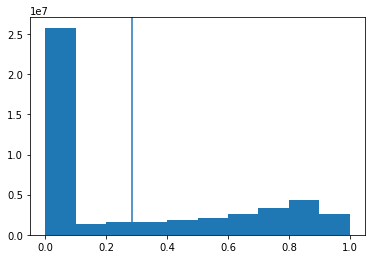

In [15]:
plt.hist(data[0].flatten())
plt.axvline(data[0].mean())

### Using the mean and std values

In [5]:
train_set_normal = torchvision.datasets.FashionMNIST(
root='./data/FashionMNIST',
train=True,
download=True,
transform=transforms.Compose([
    transforms.ToTensor()
    ,transforms.Normalize([mean], [std])
]))

In [5]:
loader = DataLoader(train_set_normal, batch_size=len(train_set), num_workers=1)
data = next(iter(loader))
data[0].mean(), data[0].std()

(tensor(0.0002), tensor(1.0018))

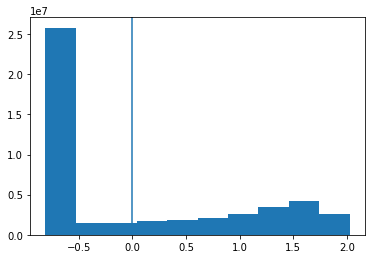

In [6]:
plt.hist(data[0].flatten())
plt.axvline(data[0].mean())

In [10]:
trainsets = {
    'not_normal': train_set
    ,'normal': train_set_normal
}

In [12]:
parameters = OrderedDict(
                lr=[.01]
                ,batch_size=[1000]
                ,num_workers=[1]
                #,shuffle=[True, False]
                ,device=['cpu']
                ,trainset= ['not_normal', 'normal']
                )

m = RunManager()
for run in RunBuilder.get_runs(parameters):
    
    device= torch.device(run.device)
    
    network = Network().to(device)          # Using devices

    loader = DataLoader(
        trainsets[run.trainset], batch_size=run.batch_size, num_workers=run.num_workers
    )
    optimizer = optim.Adam(
        network.parameters(), lr=run.lr
    ) # lr: learning rate, optim.SGD < or > Adam
    
    m.begin_run(run, network, loader)
    for epoch in range(20):
        m.begin_epoch()
        for batch in loader:
            
            images = batch[0].to(device)             # Using devices
            labels = batch[1].to(device)             # Using devices
            preds = network(images)                  # pass batch
            loss = F.cross_entropy(preds, labels)    # calculate loss
            optimizer.zero_grad()                    # Zero Gradients
            loss.backward()                          # calculate Gradients
            optimizer.step()                         # update weights
            
            m.track_loss(loss)
            m.track_num_correct(preds, labels)
            
        m.end_epoch()
#     m.end_run()
    m.tb.close()
    m.epoch_count = 0

m.save('results_nrm&ntnorm')

,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
0,1,1,1.002598,0.614867,24.428208,28.39484,0.01,1000,1,cpu,not_normal


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
0,1,1,1.002598,0.614867,24.428208,28.394840,0.01,1000,1,cpu,not_normal
1,1,2,0.550347,0.788667,23.995921,52.598899,0.01,1000,1,cpu,not_normal


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
0,1,1,1.002598,0.614867,24.428208,28.394840,0.01,1000,1,cpu,not_normal
1,1,2,0.550347,0.788667,23.995921,52.598899,0.01,1000,1,cpu,not_normal
2,1,3,0.443628,0.836983,22.768106,75.505098,0.01,1000,1,cpu,not_normal


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
0,1,1,1.002598,0.614867,24.428208,28.394840,0.01,1000,1,cpu,not_normal
1,1,2,0.550347,0.788667,23.995921,52.598899,0.01,1000,1,cpu,not_normal
2,1,3,0.443628,0.836983,22.768106,75.505098,0.01,1000,1,cpu,not_normal
3,1,4,0.386855,0.857383,22.062635,97.677809,0.01,1000,1,cpu,not_normal


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
0,1,1,1.002598,0.614867,24.428208,28.394840,0.01,1000,1,cpu,not_normal
1,1,2,0.550347,0.788667,23.995921,52.598899,0.01,1000,1,cpu,not_normal
2,1,3,0.443628,0.836983,22.768106,75.505098,0.01,1000,1,cpu,not_normal
3,1,4,0.386855,0.857383,22.062635,97.677809,0.01,1000,1,cpu,not_normal
4,1,5,0.359185,0.867000,22.191725,119.971602,0.01,1000,1,cpu,not_normal


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
0,1,1,1.002598,0.614867,24.428208,28.394840,0.01,1000,1,cpu,not_normal
1,1,2,0.550347,0.788667,23.995921,52.598899,0.01,1000,1,cpu,not_normal
2,1,3,0.443628,0.836983,22.768106,75.505098,0.01,1000,1,cpu,not_normal
3,1,4,0.386855,0.857383,22.062635,97.677809,0.01,1000,1,cpu,not_normal
4,1,5,0.359185,0.867000,22.191725,119.971602,0.01,1000,1,cpu,not_normal
5,1,6,0.343031,0.871833,22.896255,142.949913,0.01,1000,1,cpu,not_normal


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
0,1,1,1.002598,0.614867,24.428208,28.394840,0.01,1000,1,cpu,not_normal
1,1,2,0.550347,0.788667,23.995921,52.598899,0.01,1000,1,cpu,not_normal
2,1,3,0.443628,0.836983,22.768106,75.505098,0.01,1000,1,cpu,not_normal
3,1,4,0.386855,0.857383,22.062635,97.677809,0.01,1000,1,cpu,not_normal
4,1,5,0.359185,0.867000,22.191725,119.971602,0.01,1000,1,cpu,not_normal
5,1,6,0.343031,0.871833,22.896255,142.949913,0.01,1000,1,cpu,not_normal
6,1,7,0.327785,0.876850,20.955905,164.032902,0.01,1000,1,cpu,not_normal


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
0,1,1,1.002598,0.614867,24.428208,28.394840,0.01,1000,1,cpu,not_normal
1,1,2,0.550347,0.788667,23.995921,52.598899,0.01,1000,1,cpu,not_normal
2,1,3,0.443628,0.836983,22.768106,75.505098,0.01,1000,1,cpu,not_normal
3,1,4,0.386855,0.857383,22.062635,97.677809,0.01,1000,1,cpu,not_normal
4,1,5,0.359185,0.867000,22.191725,119.971602,0.01,1000,1,cpu,not_normal
5,1,6,0.343031,0.871833,22.896255,142.949913,0.01,1000,1,cpu,not_normal
6,1,7,0.327785,0.876850,20.955905,164.032902,0.01,1000,1,cpu,not_normal
7,1,8,0.315632,0.881517,22.973242,187.167252,0.01,1000,1,cpu,not_normal


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
0,1,1,1.002598,0.614867,24.428208,28.394840,0.01,1000,1,cpu,not_normal
1,1,2,0.550347,0.788667,23.995921,52.598899,0.01,1000,1,cpu,not_normal
2,1,3,0.443628,0.836983,22.768106,75.505098,0.01,1000,1,cpu,not_normal
3,1,4,0.386855,0.857383,22.062635,97.677809,0.01,1000,1,cpu,not_normal
4,1,5,0.359185,0.867000,22.191725,119.971602,0.01,1000,1,cpu,not_normal
5,1,6,0.343031,0.871833,22.896255,142.949913,0.01,1000,1,cpu,not_normal
6,1,7,0.327785,0.876850,20.955905,164.032902,0.01,1000,1,cpu,not_normal
7,1,8,0.315632,0.881517,22.973242,187.167252,0.01,1000,1,cpu,not_normal
8,1,9,0.302303,0.886567,20.738759,208.030094,0.01,1000,1,cpu,not_normal


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
0,1,1,1.002598,0.614867,24.428208,28.394840,0.01,1000,1,cpu,not_normal
1,1,2,0.550347,0.788667,23.995921,52.598899,0.01,1000,1,cpu,not_normal
2,1,3,0.443628,0.836983,22.768106,75.505098,0.01,1000,1,cpu,not_normal
3,1,4,0.386855,0.857383,22.062635,97.677809,0.01,1000,1,cpu,not_normal
4,1,5,0.359185,0.867000,22.191725,119.971602,0.01,1000,1,cpu,not_normal
5,1,6,0.343031,0.871833,22.896255,142.949913,0.01,1000,1,cpu,not_normal
6,1,7,0.327785,0.876850,20.955905,164.032902,0.01,1000,1,cpu,not_normal
7,1,8,0.315632,0.881517,22.973242,187.167252,0.01,1000,1,cpu,not_normal
8,1,9,0.302303,0.886567,20.738759,208.030094,0.01,1000,1,cpu,not_normal
9,1,10,0.293352,0.890217,22.960233,231.118414,0.01,1000,1,cpu,not_normal


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
0,1,1,1.002598,0.614867,24.428208,28.394840,0.01,1000,1,cpu,not_normal
1,1,2,0.550347,0.788667,23.995921,52.598899,0.01,1000,1,cpu,not_normal
2,1,3,0.443628,0.836983,22.768106,75.505098,0.01,1000,1,cpu,not_normal
3,1,4,0.386855,0.857383,22.062635,97.677809,0.01,1000,1,cpu,not_normal
4,1,5,0.359185,0.867000,22.191725,119.971602,0.01,1000,1,cpu,not_normal
5,1,6,0.343031,0.871833,22.896255,142.949913,0.01,1000,1,cpu,not_normal
6,1,7,0.327785,0.876850,20.955905,164.032902,0.01,1000,1,cpu,not_normal
7,1,8,0.315632,0.881517,22.973242,187.167252,0.01,1000,1,cpu,not_normal
8,1,9,0.302303,0.886567,20.738759,208.030094,0.01,1000,1,cpu,not_normal
9,1,10,0.293352,0.890217,22.960233,231.118414,0.01,1000,1,cpu,not_normal


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
0,1,1,1.002598,0.614867,24.428208,28.394840,0.01,1000,1,cpu,not_normal
1,1,2,0.550347,0.788667,23.995921,52.598899,0.01,1000,1,cpu,not_normal
2,1,3,0.443628,0.836983,22.768106,75.505098,0.01,1000,1,cpu,not_normal
3,1,4,0.386855,0.857383,22.062635,97.677809,0.01,1000,1,cpu,not_normal
4,1,5,0.359185,0.867000,22.191725,119.971602,0.01,1000,1,cpu,not_normal
5,1,6,0.343031,0.871833,22.896255,142.949913,0.01,1000,1,cpu,not_normal
6,1,7,0.327785,0.876850,20.955905,164.032902,0.01,1000,1,cpu,not_normal
7,1,8,0.315632,0.881517,22.973242,187.167252,0.01,1000,1,cpu,not_normal
8,1,9,0.302303,0.886567,20.738759,208.030094,0.01,1000,1,cpu,not_normal
9,1,10,0.293352,0.890217,22.960233,231.118414,0.01,1000,1,cpu,not_normal


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
0,1,1,1.002598,0.614867,24.428208,28.394840,0.01,1000,1,cpu,not_normal
1,1,2,0.550347,0.788667,23.995921,52.598899,0.01,1000,1,cpu,not_normal
2,1,3,0.443628,0.836983,22.768106,75.505098,0.01,1000,1,cpu,not_normal
3,1,4,0.386855,0.857383,22.062635,97.677809,0.01,1000,1,cpu,not_normal
4,1,5,0.359185,0.867000,22.191725,119.971602,0.01,1000,1,cpu,not_normal
5,1,6,0.343031,0.871833,22.896255,142.949913,0.01,1000,1,cpu,not_normal
6,1,7,0.327785,0.876850,20.955905,164.032902,0.01,1000,1,cpu,not_normal
7,1,8,0.315632,0.881517,22.973242,187.167252,0.01,1000,1,cpu,not_normal
8,1,9,0.302303,0.886567,20.738759,208.030094,0.01,1000,1,cpu,not_normal
9,1,10,0.293352,0.890217,22.960233,231.118414,0.01,1000,1,cpu,not_normal


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
0,1,1,1.002598,0.614867,24.428208,28.394840,0.01,1000,1,cpu,not_normal
1,1,2,0.550347,0.788667,23.995921,52.598899,0.01,1000,1,cpu,not_normal
2,1,3,0.443628,0.836983,22.768106,75.505098,0.01,1000,1,cpu,not_normal
3,1,4,0.386855,0.857383,22.062635,97.677809,0.01,1000,1,cpu,not_normal
4,1,5,0.359185,0.867000,22.191725,119.971602,0.01,1000,1,cpu,not_normal
5,1,6,0.343031,0.871833,22.896255,142.949913,0.01,1000,1,cpu,not_normal
6,1,7,0.327785,0.876850,20.955905,164.032902,0.01,1000,1,cpu,not_normal
7,1,8,0.315632,0.881517,22.973242,187.167252,0.01,1000,1,cpu,not_normal
8,1,9,0.302303,0.886567,20.738759,208.030094,0.01,1000,1,cpu,not_normal
9,1,10,0.293352,0.890217,22.960233,231.118414,0.01,1000,1,cpu,not_normal


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
0,1,1,1.002598,0.614867,24.428208,28.394840,0.01,1000,1,cpu,not_normal
1,1,2,0.550347,0.788667,23.995921,52.598899,0.01,1000,1,cpu,not_normal
2,1,3,0.443628,0.836983,22.768106,75.505098,0.01,1000,1,cpu,not_normal
3,1,4,0.386855,0.857383,22.062635,97.677809,0.01,1000,1,cpu,not_normal
4,1,5,0.359185,0.867000,22.191725,119.971602,0.01,1000,1,cpu,not_normal
5,1,6,0.343031,0.871833,22.896255,142.949913,0.01,1000,1,cpu,not_normal
6,1,7,0.327785,0.876850,20.955905,164.032902,0.01,1000,1,cpu,not_normal
7,1,8,0.315632,0.881517,22.973242,187.167252,0.01,1000,1,cpu,not_normal
8,1,9,0.302303,0.886567,20.738759,208.030094,0.01,1000,1,cpu,not_normal
9,1,10,0.293352,0.890217,22.960233,231.118414,0.01,1000,1,cpu,not_normal


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
0,1,1,1.002598,0.614867,24.428208,28.394840,0.01,1000,1,cpu,not_normal
1,1,2,0.550347,0.788667,23.995921,52.598899,0.01,1000,1,cpu,not_normal
2,1,3,0.443628,0.836983,22.768106,75.505098,0.01,1000,1,cpu,not_normal
3,1,4,0.386855,0.857383,22.062635,97.677809,0.01,1000,1,cpu,not_normal
4,1,5,0.359185,0.867000,22.191725,119.971602,0.01,1000,1,cpu,not_normal
5,1,6,0.343031,0.871833,22.896255,142.949913,0.01,1000,1,cpu,not_normal
6,1,7,0.327785,0.876850,20.955905,164.032902,0.01,1000,1,cpu,not_normal
7,1,8,0.315632,0.881517,22.973242,187.167252,0.01,1000,1,cpu,not_normal
8,1,9,0.302303,0.886567,20.738759,208.030094,0.01,1000,1,cpu,not_normal
9,1,10,0.293352,0.890217,22.960233,231.118414,0.01,1000,1,cpu,not_normal


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
0,1,1,1.002598,0.614867,24.428208,28.394840,0.01,1000,1,cpu,not_normal
1,1,2,0.550347,0.788667,23.995921,52.598899,0.01,1000,1,cpu,not_normal
2,1,3,0.443628,0.836983,22.768106,75.505098,0.01,1000,1,cpu,not_normal
3,1,4,0.386855,0.857383,22.062635,97.677809,0.01,1000,1,cpu,not_normal
4,1,5,0.359185,0.867000,22.191725,119.971602,0.01,1000,1,cpu,not_normal
5,1,6,0.343031,0.871833,22.896255,142.949913,0.01,1000,1,cpu,not_normal
6,1,7,0.327785,0.876850,20.955905,164.032902,0.01,1000,1,cpu,not_normal
7,1,8,0.315632,0.881517,22.973242,187.167252,0.01,1000,1,cpu,not_normal
8,1,9,0.302303,0.886567,20.738759,208.030094,0.01,1000,1,cpu,not_normal
9,1,10,0.293352,0.890217,22.960233,231.118414,0.01,1000,1,cpu,not_normal


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
0,1,1,1.002598,0.614867,24.428208,28.394840,0.01,1000,1,cpu,not_normal
1,1,2,0.550347,0.788667,23.995921,52.598899,0.01,1000,1,cpu,not_normal
2,1,3,0.443628,0.836983,22.768106,75.505098,0.01,1000,1,cpu,not_normal
3,1,4,0.386855,0.857383,22.062635,97.677809,0.01,1000,1,cpu,not_normal
4,1,5,0.359185,0.867000,22.191725,119.971602,0.01,1000,1,cpu,not_normal
5,1,6,0.343031,0.871833,22.896255,142.949913,0.01,1000,1,cpu,not_normal
6,1,7,0.327785,0.876850,20.955905,164.032902,0.01,1000,1,cpu,not_normal
7,1,8,0.315632,0.881517,22.973242,187.167252,0.01,1000,1,cpu,not_normal
8,1,9,0.302303,0.886567,20.738759,208.030094,0.01,1000,1,cpu,not_normal
9,1,10,0.293352,0.890217,22.960233,231.118414,0.01,1000,1,cpu,not_normal


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
0,1,1,1.002598,0.614867,24.428208,28.394840,0.01,1000,1,cpu,not_normal
1,1,2,0.550347,0.788667,23.995921,52.598899,0.01,1000,1,cpu,not_normal
2,1,3,0.443628,0.836983,22.768106,75.505098,0.01,1000,1,cpu,not_normal
3,1,4,0.386855,0.857383,22.062635,97.677809,0.01,1000,1,cpu,not_normal
4,1,5,0.359185,0.867000,22.191725,119.971602,0.01,1000,1,cpu,not_normal
5,1,6,0.343031,0.871833,22.896255,142.949913,0.01,1000,1,cpu,not_normal
6,1,7,0.327785,0.876850,20.955905,164.032902,0.01,1000,1,cpu,not_normal
7,1,8,0.315632,0.881517,22.973242,187.167252,0.01,1000,1,cpu,not_normal
8,1,9,0.302303,0.886567,20.738759,208.030094,0.01,1000,1,cpu,not_normal
9,1,10,0.293352,0.890217,22.960233,231.118414,0.01,1000,1,cpu,not_normal


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
0,1,1,1.002598,0.614867,24.428208,28.394840,0.01,1000,1,cpu,not_normal
1,1,2,0.550347,0.788667,23.995921,52.598899,0.01,1000,1,cpu,not_normal
2,1,3,0.443628,0.836983,22.768106,75.505098,0.01,1000,1,cpu,not_normal
3,1,4,0.386855,0.857383,22.062635,97.677809,0.01,1000,1,cpu,not_normal
4,1,5,0.359185,0.867000,22.191725,119.971602,0.01,1000,1,cpu,not_normal
5,1,6,0.343031,0.871833,22.896255,142.949913,0.01,1000,1,cpu,not_normal
6,1,7,0.327785,0.876850,20.955905,164.032902,0.01,1000,1,cpu,not_normal
7,1,8,0.315632,0.881517,22.973242,187.167252,0.01,1000,1,cpu,not_normal
8,1,9,0.302303,0.886567,20.738759,208.030094,0.01,1000,1,cpu,not_normal
9,1,10,0.293352,0.890217,22.960233,231.118414,0.01,1000,1,cpu,not_normal


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
0,1,1,1.002598,0.614867,24.428208,28.394840,0.01,1000,1,cpu,not_normal
1,1,2,0.550347,0.788667,23.995921,52.598899,0.01,1000,1,cpu,not_normal
2,1,3,0.443628,0.836983,22.768106,75.505098,0.01,1000,1,cpu,not_normal
3,1,4,0.386855,0.857383,22.062635,97.677809,0.01,1000,1,cpu,not_normal
4,1,5,0.359185,0.867000,22.191725,119.971602,0.01,1000,1,cpu,not_normal
5,1,6,0.343031,0.871833,22.896255,142.949913,0.01,1000,1,cpu,not_normal
6,1,7,0.327785,0.876850,20.955905,164.032902,0.01,1000,1,cpu,not_normal
7,1,8,0.315632,0.881517,22.973242,187.167252,0.01,1000,1,cpu,not_normal
8,1,9,0.302303,0.886567,20.738759,208.030094,0.01,1000,1,cpu,not_normal
9,1,10,0.293352,0.890217,22.960233,231.118414,0.01,1000,1,cpu,not_normal


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
0,1,1,1.002598,0.614867,24.428208,28.394840,0.01,1000,1,cpu,not_normal
1,1,2,0.550347,0.788667,23.995921,52.598899,0.01,1000,1,cpu,not_normal
2,1,3,0.443628,0.836983,22.768106,75.505098,0.01,1000,1,cpu,not_normal
3,1,4,0.386855,0.857383,22.062635,97.677809,0.01,1000,1,cpu,not_normal
4,1,5,0.359185,0.867000,22.191725,119.971602,0.01,1000,1,cpu,not_normal
5,1,6,0.343031,0.871833,22.896255,142.949913,0.01,1000,1,cpu,not_normal
6,1,7,0.327785,0.876850,20.955905,164.032902,0.01,1000,1,cpu,not_normal
7,1,8,0.315632,0.881517,22.973242,187.167252,0.01,1000,1,cpu,not_normal
8,1,9,0.302303,0.886567,20.738759,208.030094,0.01,1000,1,cpu,not_normal
9,1,10,0.293352,0.890217,22.960233,231.118414,0.01,1000,1,cpu,not_normal


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
0,1,1,1.002598,0.614867,24.428208,28.394840,0.01,1000,1,cpu,not_normal
1,1,2,0.550347,0.788667,23.995921,52.598899,0.01,1000,1,cpu,not_normal
2,1,3,0.443628,0.836983,22.768106,75.505098,0.01,1000,1,cpu,not_normal
3,1,4,0.386855,0.857383,22.062635,97.677809,0.01,1000,1,cpu,not_normal
4,1,5,0.359185,0.867000,22.191725,119.971602,0.01,1000,1,cpu,not_normal
5,1,6,0.343031,0.871833,22.896255,142.949913,0.01,1000,1,cpu,not_normal
6,1,7,0.327785,0.876850,20.955905,164.032902,0.01,1000,1,cpu,not_normal
7,1,8,0.315632,0.881517,22.973242,187.167252,0.01,1000,1,cpu,not_normal
8,1,9,0.302303,0.886567,20.738759,208.030094,0.01,1000,1,cpu,not_normal
9,1,10,0.293352,0.890217,22.960233,231.118414,0.01,1000,1,cpu,not_normal


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
0,1,1,1.002598,0.614867,24.428208,28.394840,0.01,1000,1,cpu,not_normal
1,1,2,0.550347,0.788667,23.995921,52.598899,0.01,1000,1,cpu,not_normal
2,1,3,0.443628,0.836983,22.768106,75.505098,0.01,1000,1,cpu,not_normal
3,1,4,0.386855,0.857383,22.062635,97.677809,0.01,1000,1,cpu,not_normal
4,1,5,0.359185,0.867000,22.191725,119.971602,0.01,1000,1,cpu,not_normal
5,1,6,0.343031,0.871833,22.896255,142.949913,0.01,1000,1,cpu,not_normal
6,1,7,0.327785,0.876850,20.955905,164.032902,0.01,1000,1,cpu,not_normal
7,1,8,0.315632,0.881517,22.973242,187.167252,0.01,1000,1,cpu,not_normal
8,1,9,0.302303,0.886567,20.738759,208.030094,0.01,1000,1,cpu,not_normal
9,1,10,0.293352,0.890217,22.960233,231.118414,0.01,1000,1,cpu,not_normal


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
0,1,1,1.002598,0.614867,24.428208,28.394840,0.01,1000,1,cpu,not_normal
1,1,2,0.550347,0.788667,23.995921,52.598899,0.01,1000,1,cpu,not_normal
2,1,3,0.443628,0.836983,22.768106,75.505098,0.01,1000,1,cpu,not_normal
3,1,4,0.386855,0.857383,22.062635,97.677809,0.01,1000,1,cpu,not_normal
4,1,5,0.359185,0.867000,22.191725,119.971602,0.01,1000,1,cpu,not_normal
5,1,6,0.343031,0.871833,22.896255,142.949913,0.01,1000,1,cpu,not_normal
6,1,7,0.327785,0.876850,20.955905,164.032902,0.01,1000,1,cpu,not_normal
7,1,8,0.315632,0.881517,22.973242,187.167252,0.01,1000,1,cpu,not_normal
8,1,9,0.302303,0.886567,20.738759,208.030094,0.01,1000,1,cpu,not_normal
9,1,10,0.293352,0.890217,22.960233,231.118414,0.01,1000,1,cpu,not_normal


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
0,1,1,1.002598,0.614867,24.428208,28.394840,0.01,1000,1,cpu,not_normal
1,1,2,0.550347,0.788667,23.995921,52.598899,0.01,1000,1,cpu,not_normal
2,1,3,0.443628,0.836983,22.768106,75.505098,0.01,1000,1,cpu,not_normal
3,1,4,0.386855,0.857383,22.062635,97.677809,0.01,1000,1,cpu,not_normal
4,1,5,0.359185,0.867000,22.191725,119.971602,0.01,1000,1,cpu,not_normal
5,1,6,0.343031,0.871833,22.896255,142.949913,0.01,1000,1,cpu,not_normal
6,1,7,0.327785,0.876850,20.955905,164.032902,0.01,1000,1,cpu,not_normal
7,1,8,0.315632,0.881517,22.973242,187.167252,0.01,1000,1,cpu,not_normal
8,1,9,0.302303,0.886567,20.738759,208.030094,0.01,1000,1,cpu,not_normal
9,1,10,0.293352,0.890217,22.960233,231.118414,0.01,1000,1,cpu,not_normal


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
0,1,1,1.002598,0.614867,24.428208,28.394840,0.01,1000,1,cpu,not_normal
1,1,2,0.550347,0.788667,23.995921,52.598899,0.01,1000,1,cpu,not_normal
2,1,3,0.443628,0.836983,22.768106,75.505098,0.01,1000,1,cpu,not_normal
3,1,4,0.386855,0.857383,22.062635,97.677809,0.01,1000,1,cpu,not_normal
4,1,5,0.359185,0.867000,22.191725,119.971602,0.01,1000,1,cpu,not_normal
5,1,6,0.343031,0.871833,22.896255,142.949913,0.01,1000,1,cpu,not_normal
6,1,7,0.327785,0.876850,20.955905,164.032902,0.01,1000,1,cpu,not_normal
7,1,8,0.315632,0.881517,22.973242,187.167252,0.01,1000,1,cpu,not_normal
8,1,9,0.302303,0.886567,20.738759,208.030094,0.01,1000,1,cpu,not_normal
9,1,10,0.293352,0.890217,22.960233,231.118414,0.01,1000,1,cpu,not_normal


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
0,1,1,1.002598,0.614867,24.428208,28.394840,0.01,1000,1,cpu,not_normal
1,1,2,0.550347,0.788667,23.995921,52.598899,0.01,1000,1,cpu,not_normal
2,1,3,0.443628,0.836983,22.768106,75.505098,0.01,1000,1,cpu,not_normal
3,1,4,0.386855,0.857383,22.062635,97.677809,0.01,1000,1,cpu,not_normal
4,1,5,0.359185,0.867000,22.191725,119.971602,0.01,1000,1,cpu,not_normal
5,1,6,0.343031,0.871833,22.896255,142.949913,0.01,1000,1,cpu,not_normal
6,1,7,0.327785,0.876850,20.955905,164.032902,0.01,1000,1,cpu,not_normal
7,1,8,0.315632,0.881517,22.973242,187.167252,0.01,1000,1,cpu,not_normal
8,1,9,0.302303,0.886567,20.738759,208.030094,0.01,1000,1,cpu,not_normal
9,1,10,0.293352,0.890217,22.960233,231.118414,0.01,1000,1,cpu,not_normal


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
0,1,1,1.002598,0.614867,24.428208,28.394840,0.01,1000,1,cpu,not_normal
1,1,2,0.550347,0.788667,23.995921,52.598899,0.01,1000,1,cpu,not_normal
2,1,3,0.443628,0.836983,22.768106,75.505098,0.01,1000,1,cpu,not_normal
3,1,4,0.386855,0.857383,22.062635,97.677809,0.01,1000,1,cpu,not_normal
4,1,5,0.359185,0.867000,22.191725,119.971602,0.01,1000,1,cpu,not_normal
5,1,6,0.343031,0.871833,22.896255,142.949913,0.01,1000,1,cpu,not_normal
6,1,7,0.327785,0.876850,20.955905,164.032902,0.01,1000,1,cpu,not_normal
7,1,8,0.315632,0.881517,22.973242,187.167252,0.01,1000,1,cpu,not_normal
8,1,9,0.302303,0.886567,20.738759,208.030094,0.01,1000,1,cpu,not_normal
9,1,10,0.293352,0.890217,22.960233,231.118414,0.01,1000,1,cpu,not_normal


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
0,1,1,1.002598,0.614867,24.428208,28.394840,0.01,1000,1,cpu,not_normal
1,1,2,0.550347,0.788667,23.995921,52.598899,0.01,1000,1,cpu,not_normal
2,1,3,0.443628,0.836983,22.768106,75.505098,0.01,1000,1,cpu,not_normal
3,1,4,0.386855,0.857383,22.062635,97.677809,0.01,1000,1,cpu,not_normal
4,1,5,0.359185,0.867000,22.191725,119.971602,0.01,1000,1,cpu,not_normal
5,1,6,0.343031,0.871833,22.896255,142.949913,0.01,1000,1,cpu,not_normal
6,1,7,0.327785,0.876850,20.955905,164.032902,0.01,1000,1,cpu,not_normal
7,1,8,0.315632,0.881517,22.973242,187.167252,0.01,1000,1,cpu,not_normal
8,1,9,0.302303,0.886567,20.738759,208.030094,0.01,1000,1,cpu,not_normal
9,1,10,0.293352,0.890217,22.960233,231.118414,0.01,1000,1,cpu,not_normal


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
0,1,1,1.002598,0.614867,24.428208,28.394840,0.01,1000,1,cpu,not_normal
1,1,2,0.550347,0.788667,23.995921,52.598899,0.01,1000,1,cpu,not_normal
2,1,3,0.443628,0.836983,22.768106,75.505098,0.01,1000,1,cpu,not_normal
3,1,4,0.386855,0.857383,22.062635,97.677809,0.01,1000,1,cpu,not_normal
4,1,5,0.359185,0.867000,22.191725,119.971602,0.01,1000,1,cpu,not_normal
5,1,6,0.343031,0.871833,22.896255,142.949913,0.01,1000,1,cpu,not_normal
6,1,7,0.327785,0.876850,20.955905,164.032902,0.01,1000,1,cpu,not_normal
7,1,8,0.315632,0.881517,22.973242,187.167252,0.01,1000,1,cpu,not_normal
8,1,9,0.302303,0.886567,20.738759,208.030094,0.01,1000,1,cpu,not_normal
9,1,10,0.293352,0.890217,22.960233,231.118414,0.01,1000,1,cpu,not_normal


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
0,1,1,1.002598,0.614867,24.428208,28.394840,0.01,1000,1,cpu,not_normal
1,1,2,0.550347,0.788667,23.995921,52.598899,0.01,1000,1,cpu,not_normal
2,1,3,0.443628,0.836983,22.768106,75.505098,0.01,1000,1,cpu,not_normal
3,1,4,0.386855,0.857383,22.062635,97.677809,0.01,1000,1,cpu,not_normal
4,1,5,0.359185,0.867000,22.191725,119.971602,0.01,1000,1,cpu,not_normal
5,1,6,0.343031,0.871833,22.896255,142.949913,0.01,1000,1,cpu,not_normal
6,1,7,0.327785,0.876850,20.955905,164.032902,0.01,1000,1,cpu,not_normal
7,1,8,0.315632,0.881517,22.973242,187.167252,0.01,1000,1,cpu,not_normal
8,1,9,0.302303,0.886567,20.738759,208.030094,0.01,1000,1,cpu,not_normal
9,1,10,0.293352,0.890217,22.960233,231.118414,0.01,1000,1,cpu,not_normal


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
0,1,1,1.002598,0.614867,24.428208,28.394840,0.01,1000,1,cpu,not_normal
1,1,2,0.550347,0.788667,23.995921,52.598899,0.01,1000,1,cpu,not_normal
2,1,3,0.443628,0.836983,22.768106,75.505098,0.01,1000,1,cpu,not_normal
3,1,4,0.386855,0.857383,22.062635,97.677809,0.01,1000,1,cpu,not_normal
4,1,5,0.359185,0.867000,22.191725,119.971602,0.01,1000,1,cpu,not_normal
5,1,6,0.343031,0.871833,22.896255,142.949913,0.01,1000,1,cpu,not_normal
6,1,7,0.327785,0.876850,20.955905,164.032902,0.01,1000,1,cpu,not_normal
7,1,8,0.315632,0.881517,22.973242,187.167252,0.01,1000,1,cpu,not_normal
8,1,9,0.302303,0.886567,20.738759,208.030094,0.01,1000,1,cpu,not_normal
9,1,10,0.293352,0.890217,22.960233,231.118414,0.01,1000,1,cpu,not_normal


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
0,1,1,1.002598,0.614867,24.428208,28.394840,0.01,1000,1,cpu,not_normal
1,1,2,0.550347,0.788667,23.995921,52.598899,0.01,1000,1,cpu,not_normal
2,1,3,0.443628,0.836983,22.768106,75.505098,0.01,1000,1,cpu,not_normal
3,1,4,0.386855,0.857383,22.062635,97.677809,0.01,1000,1,cpu,not_normal
4,1,5,0.359185,0.867000,22.191725,119.971602,0.01,1000,1,cpu,not_normal
5,1,6,0.343031,0.871833,22.896255,142.949913,0.01,1000,1,cpu,not_normal
6,1,7,0.327785,0.876850,20.955905,164.032902,0.01,1000,1,cpu,not_normal
7,1,8,0.315632,0.881517,22.973242,187.167252,0.01,1000,1,cpu,not_normal
8,1,9,0.302303,0.886567,20.738759,208.030094,0.01,1000,1,cpu,not_normal
9,1,10,0.293352,0.890217,22.960233,231.118414,0.01,1000,1,cpu,not_normal


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
0,1,1,1.002598,0.614867,24.428208,28.394840,0.01,1000,1,cpu,not_normal
1,1,2,0.550347,0.788667,23.995921,52.598899,0.01,1000,1,cpu,not_normal
2,1,3,0.443628,0.836983,22.768106,75.505098,0.01,1000,1,cpu,not_normal
3,1,4,0.386855,0.857383,22.062635,97.677809,0.01,1000,1,cpu,not_normal
4,1,5,0.359185,0.867000,22.191725,119.971602,0.01,1000,1,cpu,not_normal
5,1,6,0.343031,0.871833,22.896255,142.949913,0.01,1000,1,cpu,not_normal
6,1,7,0.327785,0.876850,20.955905,164.032902,0.01,1000,1,cpu,not_normal
7,1,8,0.315632,0.881517,22.973242,187.167252,0.01,1000,1,cpu,not_normal
8,1,9,0.302303,0.886567,20.738759,208.030094,0.01,1000,1,cpu,not_normal
9,1,10,0.293352,0.890217,22.960233,231.118414,0.01,1000,1,cpu,not_normal


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
0,1,1,1.002598,0.614867,24.428208,28.394840,0.01,1000,1,cpu,not_normal
1,1,2,0.550347,0.788667,23.995921,52.598899,0.01,1000,1,cpu,not_normal
2,1,3,0.443628,0.836983,22.768106,75.505098,0.01,1000,1,cpu,not_normal
3,1,4,0.386855,0.857383,22.062635,97.677809,0.01,1000,1,cpu,not_normal
4,1,5,0.359185,0.867000,22.191725,119.971602,0.01,1000,1,cpu,not_normal
5,1,6,0.343031,0.871833,22.896255,142.949913,0.01,1000,1,cpu,not_normal
6,1,7,0.327785,0.876850,20.955905,164.032902,0.01,1000,1,cpu,not_normal
7,1,8,0.315632,0.881517,22.973242,187.167252,0.01,1000,1,cpu,not_normal
8,1,9,0.302303,0.886567,20.738759,208.030094,0.01,1000,1,cpu,not_normal
9,1,10,0.293352,0.890217,22.960233,231.118414,0.01,1000,1,cpu,not_normal


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
0,1,1,1.002598,0.614867,24.428208,28.394840,0.01,1000,1,cpu,not_normal
1,1,2,0.550347,0.788667,23.995921,52.598899,0.01,1000,1,cpu,not_normal
2,1,3,0.443628,0.836983,22.768106,75.505098,0.01,1000,1,cpu,not_normal
3,1,4,0.386855,0.857383,22.062635,97.677809,0.01,1000,1,cpu,not_normal
4,1,5,0.359185,0.867000,22.191725,119.971602,0.01,1000,1,cpu,not_normal
5,1,6,0.343031,0.871833,22.896255,142.949913,0.01,1000,1,cpu,not_normal
6,1,7,0.327785,0.876850,20.955905,164.032902,0.01,1000,1,cpu,not_normal
7,1,8,0.315632,0.881517,22.973242,187.167252,0.01,1000,1,cpu,not_normal
8,1,9,0.302303,0.886567,20.738759,208.030094,0.01,1000,1,cpu,not_normal
9,1,10,0.293352,0.890217,22.960233,231.118414,0.01,1000,1,cpu,not_normal


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
0,1,1,1.002598,0.614867,24.428208,28.394840,0.01,1000,1,cpu,not_normal
1,1,2,0.550347,0.788667,23.995921,52.598899,0.01,1000,1,cpu,not_normal
2,1,3,0.443628,0.836983,22.768106,75.505098,0.01,1000,1,cpu,not_normal
3,1,4,0.386855,0.857383,22.062635,97.677809,0.01,1000,1,cpu,not_normal
4,1,5,0.359185,0.867000,22.191725,119.971602,0.01,1000,1,cpu,not_normal
5,1,6,0.343031,0.871833,22.896255,142.949913,0.01,1000,1,cpu,not_normal
6,1,7,0.327785,0.876850,20.955905,164.032902,0.01,1000,1,cpu,not_normal
7,1,8,0.315632,0.881517,22.973242,187.167252,0.01,1000,1,cpu,not_normal
8,1,9,0.302303,0.886567,20.738759,208.030094,0.01,1000,1,cpu,not_normal
9,1,10,0.293352,0.890217,22.960233,231.118414,0.01,1000,1,cpu,not_normal


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
0,1,1,1.002598,0.614867,24.428208,28.394840,0.01,1000,1,cpu,not_normal
1,1,2,0.550347,0.788667,23.995921,52.598899,0.01,1000,1,cpu,not_normal
2,1,3,0.443628,0.836983,22.768106,75.505098,0.01,1000,1,cpu,not_normal
3,1,4,0.386855,0.857383,22.062635,97.677809,0.01,1000,1,cpu,not_normal
4,1,5,0.359185,0.867000,22.191725,119.971602,0.01,1000,1,cpu,not_normal
5,1,6,0.343031,0.871833,22.896255,142.949913,0.01,1000,1,cpu,not_normal
6,1,7,0.327785,0.876850,20.955905,164.032902,0.01,1000,1,cpu,not_normal
7,1,8,0.315632,0.881517,22.973242,187.167252,0.01,1000,1,cpu,not_normal
8,1,9,0.302303,0.886567,20.738759,208.030094,0.01,1000,1,cpu,not_normal
9,1,10,0.293352,0.890217,22.960233,231.118414,0.01,1000,1,cpu,not_normal


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
0,1,1,1.002598,0.614867,24.428208,28.394840,0.01,1000,1,cpu,not_normal
1,1,2,0.550347,0.788667,23.995921,52.598899,0.01,1000,1,cpu,not_normal
2,1,3,0.443628,0.836983,22.768106,75.505098,0.01,1000,1,cpu,not_normal
3,1,4,0.386855,0.857383,22.062635,97.677809,0.01,1000,1,cpu,not_normal
4,1,5,0.359185,0.867000,22.191725,119.971602,0.01,1000,1,cpu,not_normal
5,1,6,0.343031,0.871833,22.896255,142.949913,0.01,1000,1,cpu,not_normal
6,1,7,0.327785,0.876850,20.955905,164.032902,0.01,1000,1,cpu,not_normal
7,1,8,0.315632,0.881517,22.973242,187.167252,0.01,1000,1,cpu,not_normal
8,1,9,0.302303,0.886567,20.738759,208.030094,0.01,1000,1,cpu,not_normal
9,1,10,0.293352,0.890217,22.960233,231.118414,0.01,1000,1,cpu,not_normal


In [14]:
pd.DataFrame.from_dict(m.run_data).sort_values('accuracy', ascending=False).head(10)

,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
39,2,20,0.213957,0.919500,24.874505,490.135166,0.01,1000,1,cpu,normal
36,2,17,0.216083,0.919200,24.203058,417.807176,0.01,1000,1,cpu,normal
38,2,19,0.220906,0.916483,24.642349,465.090549,0.01,1000,1,cpu,normal
37,2,18,0.220422,0.916450,22.380850,440.317111,0.01,1000,1,cpu,normal
34,2,15,0.225133,0.915667,24.258094,368.998791,0.01,1000,1,cpu,normal
35,2,16,0.225282,0.915500,24.326140,393.476032,0.01,1000,1,cpu,normal
33,2,14,0.227605,0.914833,24.527274,344.609608,0.01,1000,1,cpu,normal
32,2,13,0.232832,0.913650,24.222070,319.962255,0.01,1000,1,cpu,normal
31,2,12,0.242365,0.908900,24.455225,295.621104,0.01,1000,1,cpu,normal
17,1,18,0.246450,0.907700,21.050967,405.488115,0.01,1000,1,cpu,not_normal


## Using nn.sequential

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import math
from collections import OrderedDict

torch.set_printoptions(linewidth=150)

In [24]:
train_set = torchvision.datasets.FashionMNIST(
root='./data/FashionMNIST',
train=True,
download=True,
transform=transforms.Compose([
    transforms.ToTensor()
#     ,transforms.Normalize([mean], [std])
]))

In [25]:
image, label = train_set[0]
image.shape

torch.Size([1, 28, 28])

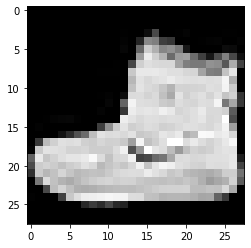

In [26]:
plt.imshow(image.squeeze(), cmap='gray') # squeeze removes color axis for image to be plotted.

In [28]:
train_set.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [29]:
in_features = image.numel()
in_features

784

In [30]:
out_features = math.floor(in_features / 2)
out_features

392

In [33]:
out_classes = len(train_set.classes)
out_classes

10

In [31]:
import sys
import torch
print(torch.__version__)
sys.version

1.4.0


'3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]'

In [34]:
network1 = nn.Sequential(
    nn.Flatten(start_dim=1) # flatten required since we are 
                            # dealing with dense network not conv....will 
                            # make it 1 dimensional...
    ,nn.Linear(in_features, out_features)
    ,nn.Linear(out_features, out_classes)
)

network1

Sequential(
  (0): Flatten()
  (1): Linear(in_features=784, out_features=392, bias=True)
  (2): Linear(in_features=392, out_features=10, bias=True)
)

In [1]:
import sys
sys.executable

'E:\\Anzconda\\envs\\torch\\python.exe'

In [35]:
network1[1]

Linear(in_features=784, out_features=392, bias=True)

In [36]:
image=image.unsqueeze(0)
image.shape

torch.Size([1, 1, 28, 28])

In [37]:
network1(image)

tensor([[-0.0109,  0.2476,  0.1617,  0.2148, -0.0450, -0.0811,  0.1017, -0.0017, -0.1593, -0.1529]], grad_fn=<AddmmBackward>)

In [38]:
layers = OrderedDict([
    ('flat', nn.Flatten(start_dim=1))
    ,('hidden', nn.Linear(in_features, out_features))
    ,('output', nn.Linear(out_features, out_classes))

])

In [39]:
network2 = nn.Sequential(layers)
network2

Sequential(
  (flat): Flatten()
  (hidden): Linear(in_features=784, out_features=392, bias=True)
  (output): Linear(in_features=392, out_features=10, bias=True)
)

In [40]:
network2(image)

tensor([[-0.0587, -0.2159,  0.2229, -0.0211,  0.1218, -0.2424, -0.1536,  0.1051,  0.0181,  0.2366]], grad_fn=<AddmmBackward>)

In [56]:
torch.manual_seed(50)
network1 = nn.Sequential(
     nn.Flatten(start_dim=1) 
    ,nn.Linear(in_features, out_features)
    ,nn.Linear(out_features, out_classes)
)

torch.manual_seed(50) # should be set before initializing each network
layers = OrderedDict([
    ('flat', nn.Flatten(start_dim=1))
    ,('hidden', nn.Linear(in_features, out_features))
    ,('output', nn.Linear(out_features, out_classes))

])

network2=nn.Sequential(layers)

In [57]:
network1(image), network2(image)

(tensor([[ 0.1681,  0.1028, -0.0790, -0.0659, -0.2436,  0.1328, -0.0864,  0.0016,  0.1819, -0.0168]], grad_fn=<AddmmBackward>),
 tensor([[ 0.1681,  0.1028, -0.0790, -0.0659, -0.2436,  0.1328, -0.0864,  0.0016,  0.1819, -0.0168]], grad_fn=<AddmmBackward>))

### Another way of initializing network

In [58]:
torch.manual_seed(50)
network3 = nn.Sequential()
network3.add_module('flat', nn.Flatten(start_dim=1))
network3.add_module('hidden', nn.Linear(in_features, out_features))
network3.add_module('output', nn.Linear(out_features, out_classes))

network3


Sequential(
  (flat): Flatten()
  (hidden): Linear(in_features=784, out_features=392, bias=True)
  (output): Linear(in_features=392, out_features=10, bias=True)
)

In [59]:
network1(image), network2(image), network3(image)

(tensor([[ 0.1681,  0.1028, -0.0790, -0.0659, -0.2436,  0.1328, -0.0864,  0.0016,  0.1819, -0.0168]], grad_fn=<AddmmBackward>),
 tensor([[ 0.1681,  0.1028, -0.0790, -0.0659, -0.2436,  0.1328, -0.0864,  0.0016,  0.1819, -0.0168]], grad_fn=<AddmmBackward>),
 tensor([[ 0.1681,  0.1028, -0.0790, -0.0659, -0.2436,  0.1328, -0.0864,  0.0016,  0.1819, -0.0168]], grad_fn=<AddmmBackward>))

In [60]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)


    def forward(self, t):
        
        t = F.relu(self.conv1(t))
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        t = F.relu(self.conv2(t))
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        t = t.flatten(start_dim=1) 
        t = F.relu(self.fc1(t))        
        t = F.relu(self.fc2(t))        
        t = self.out(t)
        
        return t


In [61]:
torch.manual_seed(50)
network = Network()
network

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

### Building the same network using Sequential Class

In [62]:
torch.manual_seed(50)
sequential1 = nn.Sequential(
         nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        ,nn.ReLU()
        ,nn.MaxPool2d(kernel_size=2, stride=2)
        ,nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        ,nn.ReLU()
        ,nn.MaxPool2d(kernel_size=2, stride=2)
        ,nn.Flatten(start_dim=1)
        ,nn.Linear(in_features=12*4*4, out_features=120)
        ,nn.ReLU()
        ,nn.Linear(in_features=120, out_features=60)
        ,nn.ReLU()
        ,nn.Linear(in_features=60, out_features=10)
)    

In [63]:
torch.manual_seed(50)
layers = OrderedDict([
         ('conv1', nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5))
        ,('relu1', nn.ReLU())
        ,('maxpool1', nn.MaxPool2d(kernel_size=2, stride=2))
        
        ,('conv2', nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5))
        ,('relu2', nn.ReLU())
        ,('maxpool2', nn.MaxPool2d(kernel_size=2, stride=2))
        
        ,('flatten', nn.Flatten(start_dim=1))
        ,('fc1', nn.Linear(in_features=12*4*4, out_features=120))
        ,('relu3', nn.ReLU())

        ,('fc2', nn.Linear(in_features=120, out_features=60))
        ,('relu4', nn.ReLU())
        ,('out', nn.Linear(in_features=60, out_features=10))
])    
sequential2 = nn.Sequential(layers)

In [64]:
torch.manual_seed(50)
sequential3=nn.Sequential()
sequential3.add_module('conv1', nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5))
sequential3.add_module('relu1', nn.ReLU())
sequential3.add_module('maxpool1', nn.MaxPool2d(kernel_size=2, stride=2))
        
sequential3.add_module('conv2', nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5))
sequential3.add_module('relu2', nn.ReLU())
sequential3.add_module('maxpool2', nn.MaxPool2d(kernel_size=2, stride=2))
        
sequential3.add_module('flatten', nn.Flatten(start_dim=1))
sequential3.add_module('fc1', nn.Linear(in_features=12*4*4, out_features=120))
sequential3.add_module('relu3', nn.ReLU())

sequential3.add_module('fc2', nn.Linear(in_features=120, out_features=60))
sequential3.add_module('relu4', nn.ReLU())
sequential3.add_module('out', nn.Linear(in_features=60, out_features=10))   


In [65]:
sequential1

Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten()
  (7): Linear(in_features=192, out_features=120, bias=True)
  (8): ReLU()
  (9): Linear(in_features=120, out_features=60, bias=True)
  (10): ReLU()
  (11): Linear(in_features=60, out_features=10, bias=True)
)

In [66]:
sequential2

Sequential(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten()
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (relu4): ReLU()
  (out): Linear(in_features=60, out_features=10, bias=True)
)

In [67]:
sequential3

Sequential(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten()
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (relu4): ReLU()
  (out): Linear(in_features=60, out_features=10, bias=True)
)

In [69]:
network(image),sequential1(image),sequential2(image),sequential3(image)

(tensor([[-0.0957,  0.1053, -0.1055,  0.1547, -0.0366, -0.0132,  0.0749, -0.1152,  0.0426,  0.0639]], grad_fn=<AddmmBackward>),
 tensor([[-0.0957,  0.1053, -0.1055,  0.1547, -0.0366, -0.0132,  0.0749, -0.1152,  0.0426,  0.0639]], grad_fn=<AddmmBackward>),
 tensor([[-0.0957,  0.1053, -0.1055,  0.1547, -0.0366, -0.0132,  0.0749, -0.1152,  0.0426,  0.0639]], grad_fn=<AddmmBackward>),
 tensor([[-0.0957,  0.1053, -0.1055,  0.1547, -0.0366, -0.0132,  0.0749, -0.1152,  0.0426,  0.0639]], grad_fn=<AddmmBackward>))